<a href="https://colab.research.google.com/github/Rudrajit12/Book-Sales-Ratings/blob/main/Book_Sales_%26_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 🧾 **Problem Statement**

In today’s highly competitive publishing industry, understanding what drives book success—whether it’s sales volume, reader ratings, author reputation, or genre trends—is essential for publishers, bookstores, and authors alike. However, making informed decisions in this domain often lacks the support of structured, data-driven analysis.

This project leverages a comprehensive dataset of books encompassing details such as publishing year, author ratings, book reviews, sales performance, pricing, and genre classification. Through exploratory data analysis (EDA), the goal is to uncover key insights into market trends, author performance, and evolving reader preferences.

We aim to answer questions like:
- Which genres and authors generate the most revenue and reader engagement?
- How do pricing and author ratings influence a book’s commercial success?
- What trends can be observed in publishing patterns and reader tastes over the years?

By exploring these questions, this project offers actionable insights for stakeholders in the book industry—helping them make smarter decisions on publishing, promotion, and stocking strategies.

---


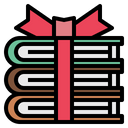

## 📌 **Project Objectives**

1. Market Analysis

  Goal: Identify high-performing genres, authors, and pricing strategies in terms of sales and revenue.

  Key Questions:

  * Which genres generate the most revenue or units sold?

  * Which authors have the highest total sales or gross revenue?

  * Is there a relationship between sale price and sales rank or units sold?

2. Author Performance Evaluation

  Goal: Evaluate the success of authors based on their ratings and financial/book performance.

  Key Questions:

  * Do high author ratings correspond to higher book average ratings or sales?

  * Which authors consistently perform well across both critical (ratings) and commercial (sales) metrics?

  * Are there underrated authors (high-rated but low-selling) or overperforming authors (low-rated but high-selling)?

3. Trend Analysis Over Time

  Goal: Analyze how book trends have evolved across years by genre, ratings, and sales.

  Key Questions:

  * How has the number of books published per year changed?

  * What genres gained or lost popularity over time?

  * Are newer books performing better in terms of ratings or sales?

### 📘 **Step 1: Data Loading**

In this first step, we’ll load the dataset and take an initial look at its structure. We'll use Pandas, a powerful Python library commonly used for data analysis and manipulation.

📌 **Why this step matters:**
Before diving into analysis, it's important to load the dataset into memory so we can explore, clean, and visualize it. It also helps us confirm that the data was read correctly and is structured as expected.

In [1]:
# Loading and importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [13,9]
sns.set(rc={'figure.figsize':(13,9)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading the data
books_df = pd.read_csv('/content/drive/MyDrive/EDA Projects/Book Sales & Ratings/Books_Data_Clean.csv')
books_df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
# last 5 rows of the data
books_df.tail(5)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106
1069,1069,1999.0,Tripwire,Lee Child,eng,Excellent,4.07,55251,genre fiction,316.94,0.000,2.99,1273,"Amazon Digital Services, Inc.",106


💬 **What this code does:**

* We import pandas and use the alias pd, which is standard in the Python data community.

* We define the file path and use pd.read_csv() to read the CSV file into a DataFrame (a tabular structure like a spreadsheet).

* df.head() lets us preview the first 5 rows so we can get a feel for what the data looks like.

### 📘 **Step 2: Data Overview & Basic Info**

📌 **Why this step matters:**

* Understanding the dataset’s structure helps identify:

* What kind of data we’re dealing with (text, numbers, dates, etc.)

* Whether we need to clean or transform any columns

* If there are missing values or duplicates we need to handle

#### 🧾 **2.1 Dataset Dimensions**

In [5]:
# Shape of the dataset
print(f"The dataset contains {books_df.shape[0]} rows and {books_df.shape[1]} columns.")

The dataset contains 1070 rows and 15 columns.


🔍 This tells us how many records (books) and features (attributes) we’re working with.

#### 🧾 **2.2 Column Names and Data Types**

In [6]:
# View column names and data types
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

🔍 df.info() gives:

* Column names

* Non-null count (helps detect missing data)

* Data types (int, float, object, etc.)

This helps us understand what type of operations are possible on each column.

📌 **Key Observations:**

* `Categorical columns`: Book Name, Author, language_code, genre, publisher, Author_Rating

* `Numerical columns`: Book_average_rating, Book_ratings_count, gross sales, publisher revenue, sale price, sales rank, units sold, Publishing Year

* 🔄 Note: Although Publishing Year is numeric (float64), it represents time. We might convert it to a datetime type or use it as a categorical time feature for trend analysis.

#### 🧾 **2.3 Summary Statistics for Numerical Columns**

In [7]:
# Basic statistical summary for numerical features
books_df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


🔍 describe() shows:

* Count, mean, std deviation, min/max, and percentiles

* Useful for understanding ranges, averages, and detecting outliers


🧠 **Summary of Key Insights:**

1. 🚨 Data Quality Issues:

  * The Publishing Year column contains an invalid value (-560), which is historically inaccurate and needs to be cleaned.

  * Some columns like sale price and publisher revenue contain zero values, which may either be legitimate (e.g., free ebooks, promotional content) or require correction depending on context.

2. 📊 Skewed Distributions & Outliers:

  * Multiple numerical columns such as Book_ratings_count, gross sales, publisher revenue, and units sold show signs of high skewness and wide ranges.

  * For example, units sold range from 106 to 61,560, and gross sales go up to $47,795.

  * These outliers will need special attention in later EDA and modeling (e.g., log transformation or segmentation).

3. ⭐ Consistently High Ratings:

  * The Book_average_rating has a narrow range (2.97 to 4.77) with a mean of ~4.0, indicating generally positive feedback across the board.

  * This might limit the usefulness of ratings for distinguishing between books, but combining it with ratings count can provide richer insight.

4. 📈 Sales & Price Variability:

  * Book sale prices vary significantly (up to $33.86) and revenue can reach tens of thousands of dollars, reinforcing that some books perform exceptionally well financially.

  * We'll want to explore what factors drive sales success, especially in top performers.

#### 🧾 **2.4 Checking for Missing Values**

In [8]:
# Total missing values per column
books_df.isnull().sum()

,0
index,0
Publishing Year,1
Book Name,23
Author,0
language_code,53
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


🔍 This helps us detect if we need to handle incomplete data in the cleaning step.

🔧 **Action Plan:**

Since Book Name and language_code are important categorical features, and the number of missing entries is relatively small, we’ll decide whether to:

* Fill with placeholder (e.g., "Unknown")

* Drop rows if they aren't critical

For Publishing Year, the single missing value can be dropped or imputed depending on its importance.

#### 🧾 **2.5 Checking for Duplicate Records**

In [9]:
# Total number of duplicate rows
books_df.duplicated().sum()

np.int64(0)

🔍 Duplicate records can distort analysis, so we flag them early for removal if needed.

No need to remove duplicates — the dataset is clean in that regard.

### 🧹 **Step 3: Data Cleaning**

#### **3.1 Checking for Invalid Publishing Year Values**

In [10]:
# Check the range of publishing years
print("Min Year:", books_df['Publishing Year'].min())
print("Max Year:", books_df['Publishing Year'].max())

# View rows with suspicious years
books_df[books_df['Publishing Year'] < 0]

Min Year: -560.0
Max Year: 2016.0


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
241,241,-380.0,Î Î¿Î»Î¹Ï„ÎµÎ¯Î±,"Plato, Desmond Lee",eng,Intermediate,3.90,110274,genre fiction,387.09,232.254,0.99,265,"Amazon Digital Services, Inc.",391
293,293,-430.0,ÎŸá¼°Î´Î¯Ï€Î¿Ï…Ï‚ Î¤ÏÏÎ±Î½Î½Î¿Ï‚,"Sophocles, J.E. Thomas",eng,Intermediate,3.67,119496,genre fiction,2460.92,1476.552,7.99,315,Hachette Book Group,308
568,568,-300.0,é“å¾·ç¶“ [dÃ o dÃ© jÄ«ng],"Lao Tzu, Gia-Fu Feng, Jane English, Chungliang...",eng,Excellent,4.31,39863,genre fiction,665.55,399.330,4.59,632,Penguin Group (USA) LLC,3915
589,589,-560.0,Aesopica,"Aesop, Laura Harris, Laura Gibbs",eng,Excellent,4.05,88508,genre fiction,693.61,0.000,4.99,663,"Amazon Digital Services, Inc.",53784
749,749,-17.0,Ã†neis,"Virgil, Robert Fitzgerald",eng,Intermediate,3.81,75051,genre fiction,114.84,0.000,0.99,863,"Amazon Digital Services, Inc.",31752
990,990,-441.0,á¼ˆÎ½Ï„Î¹Î³ÏŒÎ½Î·,"Sophocles, J.E. Thomas",eng,Intermediate,3.60,67608,genre fiction,106.92,64.152,0.99,1167,"Amazon Digital Services, Inc.",108


📌 **Insight:**

* We already know there's a year value of -560, which is invalid and there are many records with Publishing Year < 0.

* Let’s remove it.

In [11]:
# Remove rows with invalid publishing years
books_df = books_df[books_df['Publishing Year'] >= 0]
books_df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


#### **3.2 Handling Missing Values**

**Recall:**

* Publishing Year → 1 missing

* Book Name → 23 missing

* language_code → 53 missing

Let's fill in the missing values.

In [12]:
# Fill in missing values (if keeping rows)
books_df['Book Name'].fillna('Unknown Title', inplace=True)
books_df['language_code'].fillna('unknown', inplace=True)
books_df['Publishing Year'].fillna(books_df['Publishing Year'].median(), inplace=True)

In [13]:
# check for missing values
books_df.isnull().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,0
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


#### **3.3 Check for Zero or Suspicious Values**

We’ll check if any critical numeric columns have zero values that could distort analysis.

In [14]:
zero_check_cols = ['sale price', 'gross sales', 'publisher revenue', 'units sold']
for col in zero_check_cols:
    print(f"{col}: {(books_df[col] == 0).sum()} zero entries")

sale price: 0 zero entries
gross sales: 0 zero entries
publisher revenue: 370 zero entries
units sold: 0 zero entries


In [15]:
# Check the dataset shape after cleaning
books_df.shape

(1063, 15)

#### ✔ **Data Cleaning Actions Performed:**

1. **Removed Invalid Year Entries**  
   - Detected an invalid publishing year value (`-560`), which is historically incorrect.  
   - ✅ **Dropped rows where `Publishing Year` < 0** to maintain data integrity.

2. **Handled Missing Values**  
   - Columns with missing data:
     - `Book Name`: 23 missing
     - `language_code`: 53 missing
     - `Publishing Year`: 1 missing  
   - ✅ **Imputed missing values using appropriate strategies**:
     - Filled `Book Name` with `"Unknown Title"`
     - Filled `language_code` with `"unknown"`
     - Filled `Publishing Year` with the **median value**

3. **Checked for Zero Values in Key Numeric Columns**  
   - Looked for zeros in columns that represent financial or sales performance:
     - `sale price`: ✅ 0 zero entries
     - `gross sales`: ✅ 0 zero entries
     - `publisher revenue`: ⚠ **370 zero entries**
     - `units sold`: ✅ 0 zero entries

---

#### 🧐 **Interpretation:**

- A **significant number of books (370)** have `publisher revenue = 0`, even though their `gross sales` and `units sold` are non-zero.
- These entries may represent:
  - Free or promotional distributions.
  - Specific revenue-sharing agreements.
  - Missing or unrecorded revenue figures.
- 📌 We'll **retain them** for now and revisit them during the **sales analysis phase** to investigate deeper.

---


#### **3.4 Check for Outliers**

**📌 Interquartile Range (IQR) Method Recap**

For each column:

  - Calculate Q1 (25th percentile) and Q3 (75th percentile)

  - Compute IQR = Q3 - Q1

  - Define outlier boundaries:

    - Lower Bound = Q1 - 1.5 × IQR

    - Upper Bound = Q3 + 1.5 × IQR

  - Remove rows where the value is outside these bounds

In [16]:
# Columns to treat
cols_to_check = ['Book_ratings_count', 'gross sales', 'publisher revenue', 'sale price']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    before = df.shape[0]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = df.shape[0]

    print(f"{column}: Removed {before - after} outliers")
    return df

# Apply IQR method to each specified column
for col in cols_to_check:
    books_df = remove_outliers_iqr(books_df, col)

# Store the cleaned dataframe for further analysis
books_df_cleaned = books_df

Book_ratings_count: Removed 13 outliers
gross sales: Removed 119 outliers
publisher revenue: Removed 9 outliers
sale price: Removed 5 outliers


**🧠 Insight After Outlier Removal**

- These outliers were high-end extreme values that could skew mean calculations, correlations, and visual plots.

- Removing them helps in understanding typical patterns and trends more accurately.

- Still, we preserve extreme performers in separate highlights (like Top 3 books or Top Publishers).

In [17]:
# check summary statistics
books_df_cleaned.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,596.725191,1985.596510,4.009368,88095.087241,805.401778,346.864377,4.440894,684.174482,10868.840785
std,279.718821,59.037557,0.247807,25930.652311,595.509877,387.413047,3.176820,338.468362,16102.661819
min,19.000000,1308.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,19.000000,106.000000
25%,371.000000,1986.000000,3.860000,68255.000000,343.850000,0.000000,1.990000,401.000000,535.000000
50%,604.000000,2003.000000,4.020000,83235.000000,648.450000,209.898000,3.990000,690.000000,4240.000000
75%,836.000000,2010.000000,4.170000,103844.000000,1144.040000,613.326000,6.590000,973.000000,5805.000000
max,1069.000000,2016.000000,4.770000,176433.000000,3035.340000,1583.604000,13.780000,1273.000000,61560.000000


### 📊 **Step 4: Univariate Analysis**

🎯 **Objective:**

Explore and visualize each individual variable—both categorical and numerical—to:

* Understand value distributions

* Detect skewness or outliers

* Identify dominant or rare categories

#### **4.1 🔢 Numerical Features**

We'll begin with key numerical columns:

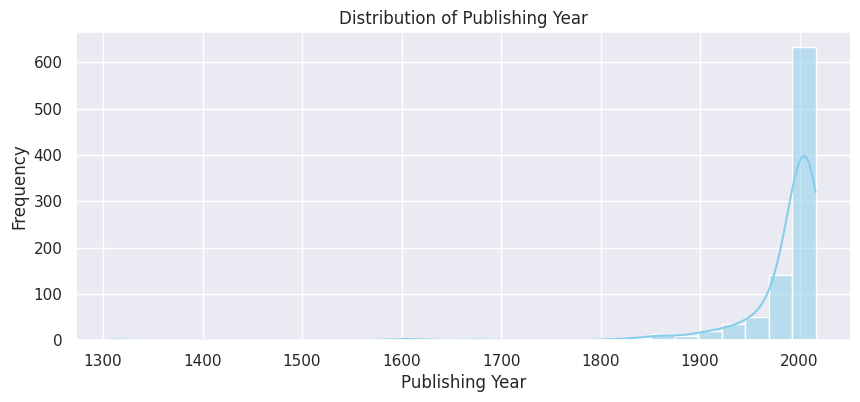

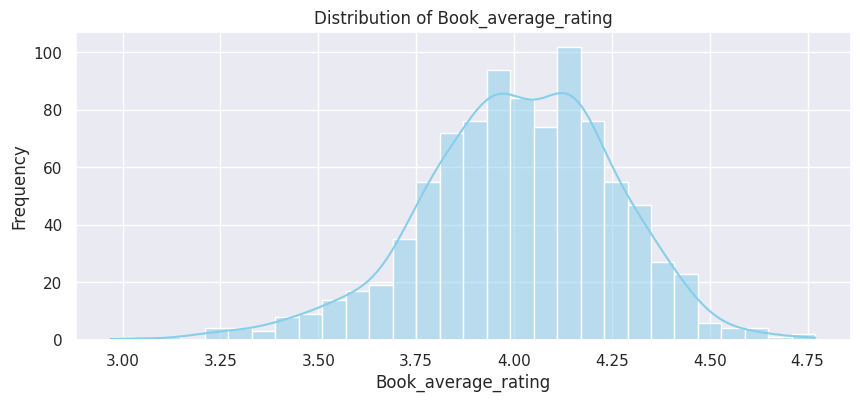

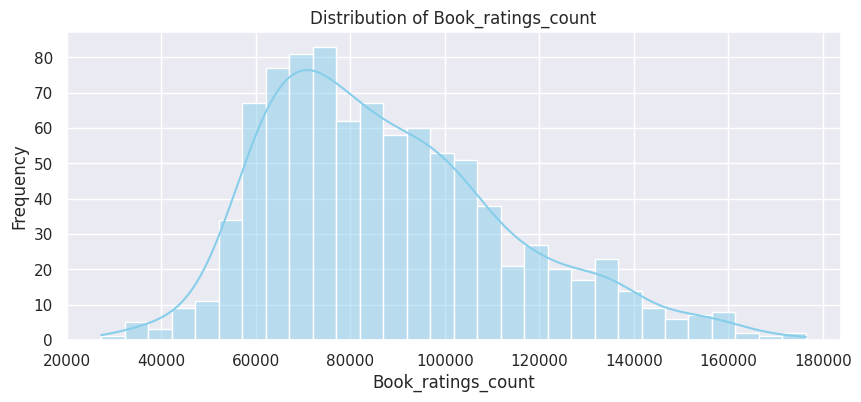

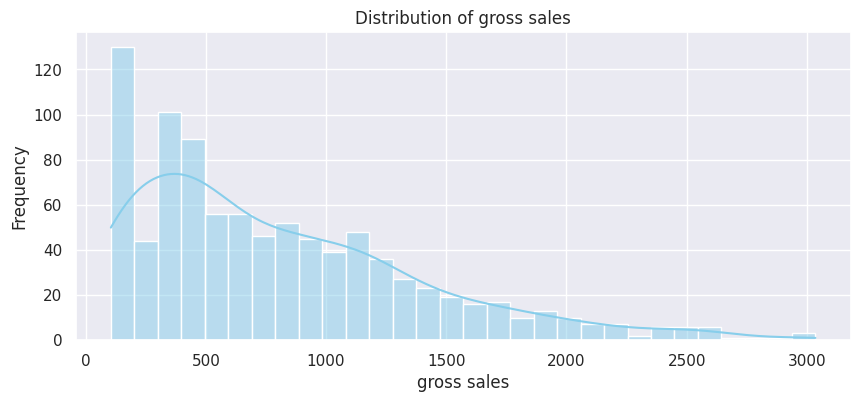

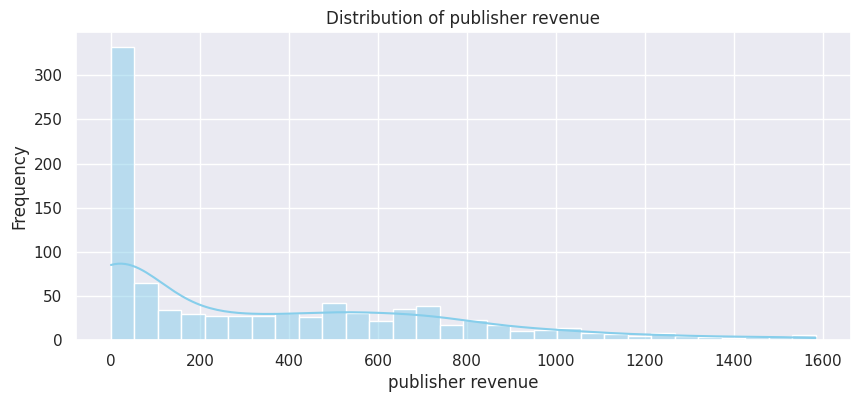

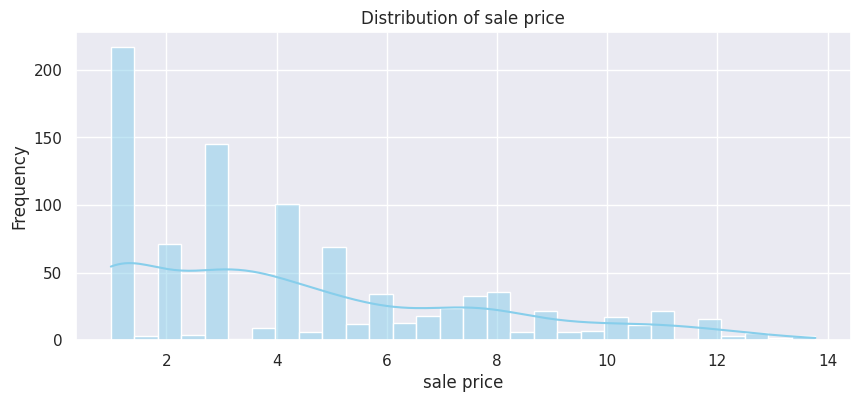

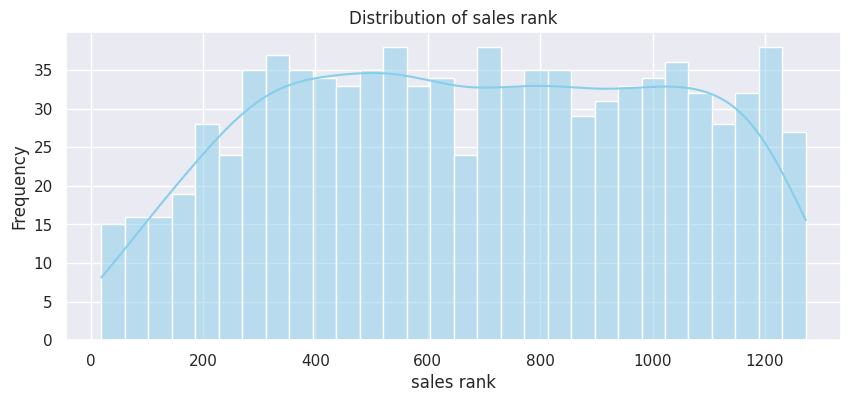

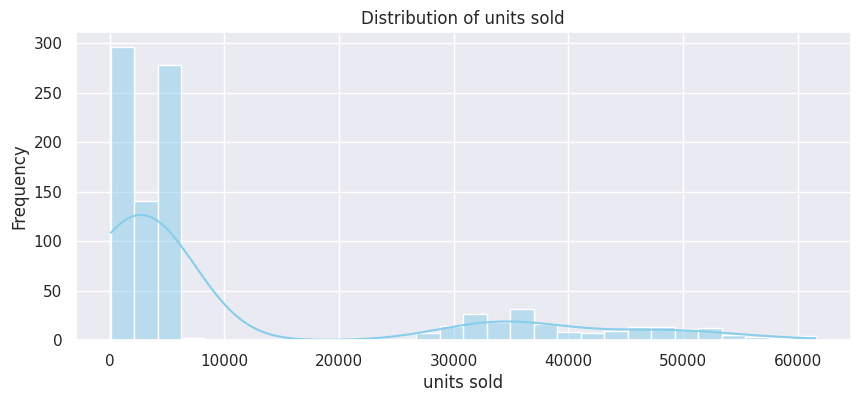

In [18]:
# List of numerical columns
numerical_cols = [
    'Publishing Year', 'Book_average_rating', 'Book_ratings_count',
    'gross sales', 'publisher revenue', 'sale price', 'sales rank', 'units sold'
]

# Plot distributions
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(books_df_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### 📌 **Key Insights**
#### 📅 **Publishing Year**
- Distribution is **heavily left-skewed**, with most books published after **1980**.
- There's a noticeable **spike in books published between 2000 and 2015**, showing growing publishing activity in recent decades.
- Only a few books are older than 1900 — likely classics or historical texts.

---

#### ⭐ **Book Average Rating**
- Ratings are **clustered tightly around 4.0**, with most books rated between **3.8 and 4.3**.
- Very few books are rated below 3.5 or above 4.7.
- This indicates a **positive bias in reader ratings**, possibly due to self-selection (readers often pick books they expect to like).

---

#### 💬 **Book Ratings Count**
- The distribution remains right-skewed, but extreme values have been removed for a clearer view of typical reader engagement.
- Most books now have under 150,000 ratings, with outliers above that removed to reduce skew.
- This adjustment allows for a more balanced analysis, while still showing that a long-tail effect persists — where a relatively small group of books attract significantly more attention than the average.
---

#### 💰 **Gross Sales & Publisher Revenue**
- Both of these metric had extreme outliers that inflated average values.
- Outlier removal provided a more stable and interpretable distribution.
- Most books now fall within a more realistic and concentrated sales range, making comparisons across genres and publishers more meaningful.
- Now we can better assess revenue patterns across typical books without the skew caused by mega-sellers.
- Notably, **370 books have zero publisher revenue**, which we flagged earlier for deeper analysis.

---

#### 💵 **Sale Price**
- Original data had unusually high-priced books, skewing the overall distribution.
- After removing outliers, we see most books are priced within a reasonable market range.
- This helps us better understand genre-based pricing strategies and evaluate average consumer expectations.

---

#### 📉 **Sales Rank**
- A **significant number of books have low sales ranks (<300)**, suggesting many are solid performers.
- Distribution is dense around the complete range following almost an uniform distribution.

---

#### 📦 **Units Sold**
- As expected, also **right-skewed**.
- Most books sold under **10,000 units**, but some blockbusters exceeded **60,000 units sold**.
- Sales performance varies greatly—some books are niche; others have broad market appeal.

---

#### 🧠 **Summary Takeaways**

- The dataset is **highly skewed in most numeric metrics**, especially in sales, ratings count, and revenue.
- A few **blockbuster books** stand out in terms of popularity and revenue, while the majority have modest engagement.
- The ratings system may have **limited variability**, but ratings count and units sold offer stronger signals of reader preference and success.
- Further analysis (like bivariate plots) will help us **connect these insights** to specific genres, authors, and pricing strategies.

---


#### 🗂️ **4.2: Categorical Variable Analysis**

🎯 **Objective:**

To analyze and visualize categorical columns to understand:

* Which categories are most/least frequent

* Dominant genres, languages, authors, and publishers

* Market diversity and concentration

**4.2.1 📚 Most Frequent Book Titles**

In [19]:
# Count of unique book names
print("Unique book titles:", books_df_cleaned['Book Name'].nunique())

# Top 10 most frequent book names (if duplicates exist)
books_df_cleaned['Book Name'].value_counts().head(10)

Unique book titles: 899


,count
Book Name,
Unknown Title,17
The Awakening,2
Persepolis,2
The Case for Christ,1
Knife of Dreams,1
Hoot,1
This is How You Lose Her,1
ã‚¢ãƒ•ã‚¿ãƒ¼ãƒ€ãƒ¼ã‚¯ [AfutÄ dÄku],1
Ishmael: An Adventure of the Mind and Spirit,1


* "Book Name" is a critical identifier for analysis, visualization, and interpretation

* Having 22 entries (~2% of the dataset) without a real title reduces interpretability

**✅ Drop Rows with Unknown Title**

In [20]:
# Drop rows where Book Name is "Unknown Title"
books_df_cleaned = books_df_cleaned[books_df_cleaned['Book Name'] != "Unknown Title"]
print("Remaining rows after dropping unknown titles:", len(books_df_cleaned))

Remaining rows after dropping unknown titles: 900


In [21]:
# Count of unique book names
print("Unique book titles:", books_df_cleaned['Book Name'].nunique())

Unique book titles: 898


❌ Dropped 22 rows where Book Name was missing and had been imputed as "Unknown Title", as these entries lack sufficient identifying information and do not contribute meaningfully to the analysis.

**4.2.2 👤 Most Prolific Authors**

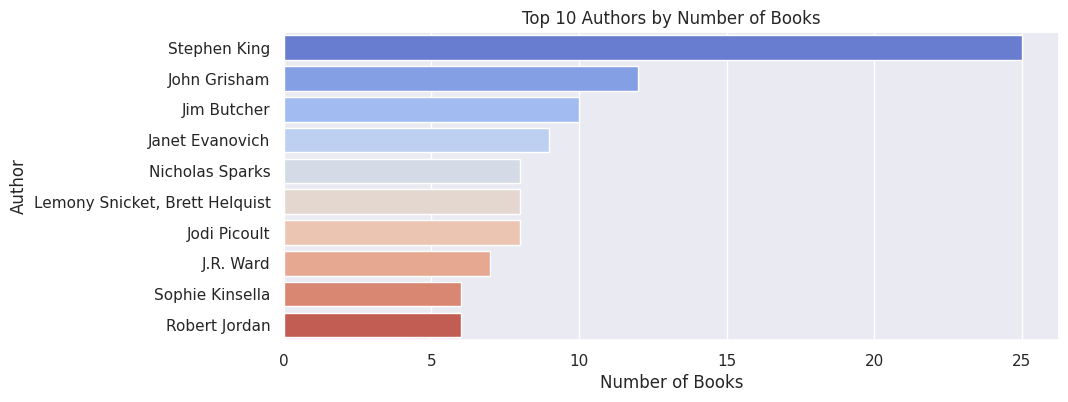

In [22]:
# Top 10 authors by number of books in the dataset
top_authors = books_df_cleaned['Author'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

📝 Insight: This shows which authors dominate the dataset. We can later compare this with their average ratings or sales.

**4.2.3 🌍 Language Distribution**

In [23]:
# Value counts
lang_counts = books_df_cleaned['language_code'].value_counts()
print(lang_counts)

language_code
eng        622
en-US      193
unknown     45
en-GB       26
en-CA        6
fre          4
ara          2
spa          1
nl           1
Name: count, dtype: int64


**🧠 Why Combine en, en-US, en-GB, en-CA into "eng"?**

These variants all represent English language, just tagged with different regional codes. While they may technically differ in spelling or usage, for the purposes of book market analysis, they usually don't warrant separate treatment unless you're analyzing regional publishing trends — which we’re not focused on here.

By combining them:

- You avoid fragmenting English-language books into multiple categories

- Your language analysis becomes clearer and more aggregated

- Visualizations and groupings won’t be cluttered by near-duplicates

In [24]:
# Combine English variants into a single category
books_df_cleaned['language_code'] = books_df_cleaned['language_code'].replace({
    'en': 'eng',
    'en-US': 'eng',
    'en-GB': 'eng',
    'en-CA': 'eng'
})

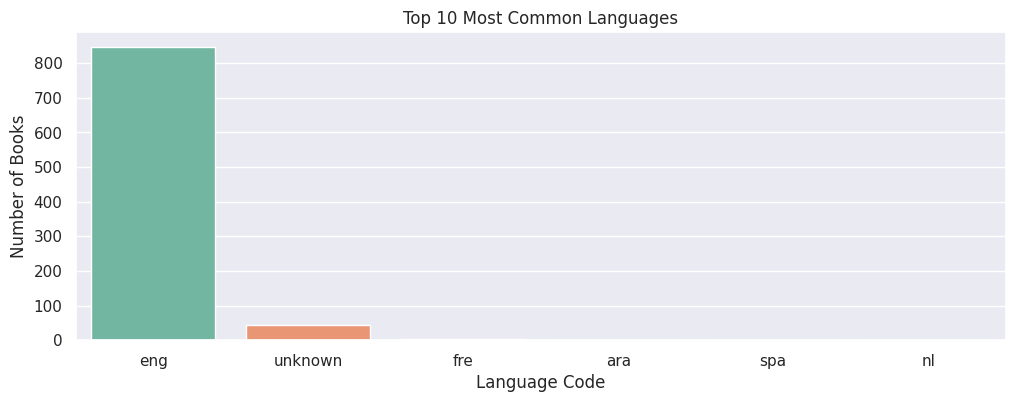

In [25]:
# Language code distribution
plt.figure(figsize=(12, 4))
lang_counts = books_df_cleaned['language_code'].value_counts().head(10)

sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='Set2')
plt.title('Top 10 Most Common Languages')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()

📝 Insight: Highlights the most published languages—likely dominance of English (en), followed by translations or native works in other major languages.

**4.2.4 🧬 Genre Distribution**

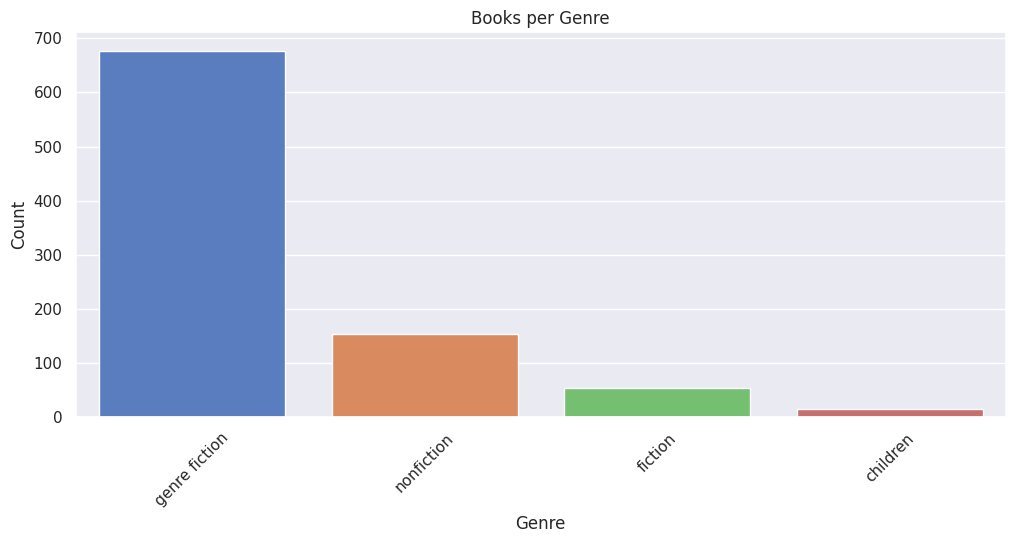

In [26]:
# Genre distribution
plt.figure(figsize=(12, 5))
genre_counts = books_df_cleaned['genre'].value_counts()

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')
plt.title('Books per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**🛠️ Combine "genre-fiction" with "fiction"**

In [27]:
# Standardize genre column: Combine 'genre-fiction' into 'fiction'
books_df_cleaned['genre'] = books_df_cleaned['genre'].replace('genre fiction', 'fiction')

# Optional: Check if the replacement worked
print(books_df_cleaned['genre'].value_counts())

genre
fiction       732
nonfiction    153
children       15
Name: count, dtype: int64


🔄 Replaced "genre-fiction" with "fiction" in the genre column to resolve category duplication and ensure consistency in genre-level analysis.

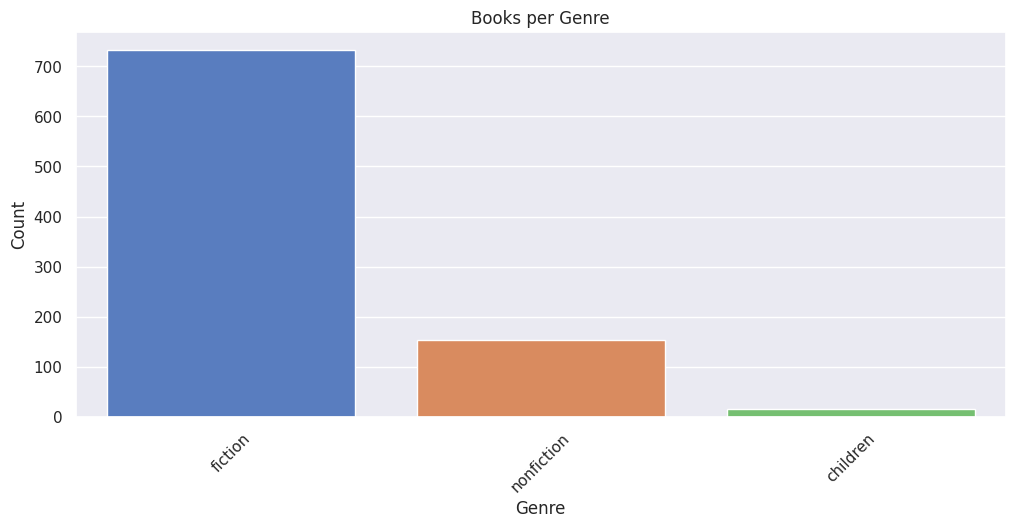

In [28]:
# Genre distribution
plt.figure(figsize=(12, 5))
genre_counts = books_df_cleaned['genre'].value_counts()

sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')
plt.title('Books per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**4.2.5 🏢 Top Publishers**

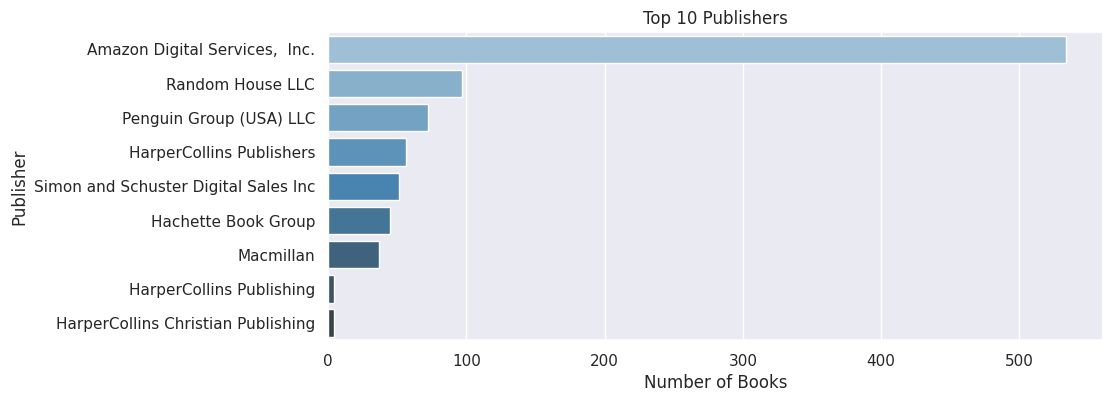

In [29]:
# Top publishers
top_publishers = books_df_cleaned['Publisher '].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='Blues_d')
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

📝 Insight: Useful for understanding which publishers have the largest share of books in the dataset and could potentially influence trends.

**🛠️ Fix the Column Name**

In [30]:
# Strip whitespace from all column names
books_df_cleaned.columns = books_df_cleaned.columns.str.strip()

# Confirm the correction
print(books_df_cleaned.columns)

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher', 'units sold'],
      dtype='object')


This is a clean way to fix not just "Publisher " but any other column with accidental leading/trailing spaces.

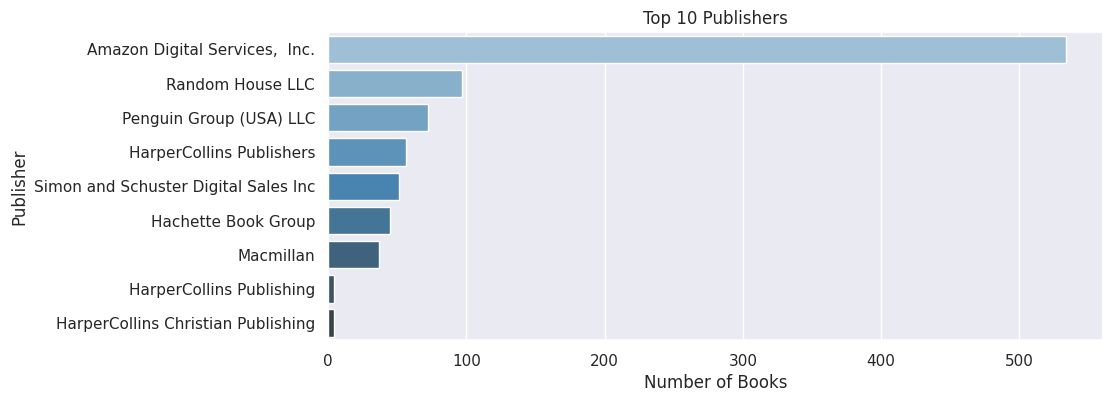

In [31]:
# Top publishers
top_publishers = books_df_cleaned['Publisher'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='Blues_d')
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

#### ✅ **Cleaning Actions:**

1. **Dropped 22 rows** with `"Unknown Title"` in `Book Name` — these were originally missing and do not contribute meaningful insights.
2. **Standardized genres** by replacing `"genre fiction"` with `"fiction"` to ensure consistent categorization.
3. **Fixed column name formatting**: `"Publisher "` was renamed to `"Publisher"` by stripping trailing whitespace from all column names.
4. 🔤 Merged English language variants (en, en-US, en-GB, en-CA) into a single "eng" category for simplicity and cleaner language-based analysis.

---

#### 📌 **Key Insights from Categorical Features:**

#### 📚 `Book Name`
- After cleaning, we now have **898 unique book titles**.
- No duplicate book names exist post-cleaning.
- Ensures each row represents a distinct book entry.

#### 👤 `Author`
- The dataset contains a **diverse range of authors**.
- A few authors have contributed multiple books, with the **top 10 most prolific authors** accounting for a noticeable portion of entries.
- This opens doors for deeper **author-level trend analysis** in later stages.

#### 🌍 `language_code`
- Most books are written in **English (`en`)**, followed by a smaller number of books in other languages like `fre`, `spa`, and `ara`.
- Suggests an **English-language dominance**, but also reflects a **multilingual market**.

#### 🧬 `genre`
- **Fiction dominates** the dataset by far, especially after merging `"genre-fiction"` with `"fiction"`.
- Other popular genres include **children**, and **non-fiction**.
- This allows us to later compare genres in terms of sales, ratings, and trends.

#### 🏢 `Publisher`
- A few publishers dominate the dataset, with the **top 10 accounting for a significant number of books**.
- Many publishers have only 1–2 books, suggesting a **long tail of smaller or independent publishers**.
- This can influence both marketing reach and sales potential.

---

#### 🧠 **What This Tells Us:**
- The categorical data is **clean, consolidated, and reliable** for deeper analysis.
- Strong patterns are emerging — e.g., **dominance of fiction, English language, and a few key publishers**.
- This sets us up perfectly for **bivariate and multivariate analysis**, where we’ll start connecting these categorical features to ratings, revenue, and more.

---


### 🔗 **Step 5: Bivariate Analysis**

#### **5.1 📈 Relationship: Book_average_rating vs Book_ratings_count**

🎯 Question:

Are more-rated books also the ones that are better rated?
Does popularity (ratings count) link to reader satisfaction?

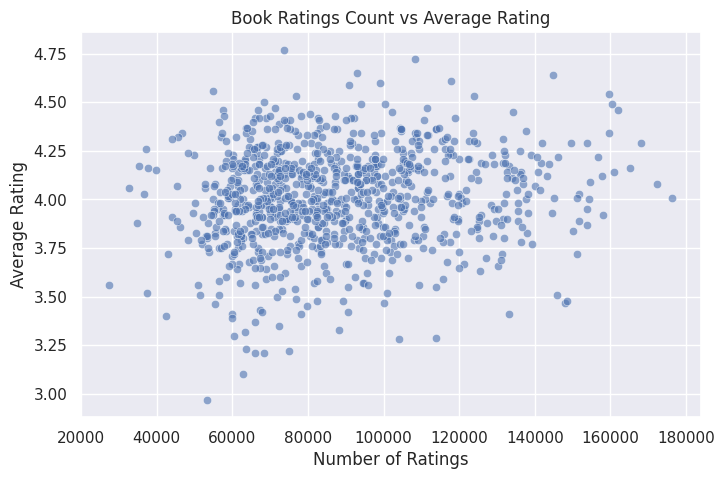

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=books_df_cleaned,
    x='Book_ratings_count',
    y='Book_average_rating',
    alpha=0.6
)
plt.title('Book Ratings Count vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

**🧠 Insight:**

Here’s what we typically see in such a plot (and you can confirm this with your version):

- No strong correlation: Books with high rating counts don't necessarily have the highest average ratings.

- However, there is a concentration around 4.0–4.3 average rating for popular books, suggesting that:

- Popular books tend to perform well

- Extremely high average ratings (>4.5) are mostly for books with fewer ratings, possibly due to fan bias or niche appeal.

📌 **Key Takeaway:**

Popularity (ratings count) and quality (average rating) are not linearly linked. High exposure doesn’t always mean higher satisfaction — and vice versa.

#### **5.2 💰 sale price vs units sold**

🎯 Question:

Does the price of a book affect how many units it sells?
Are cheaper books more popular — or do premium books dominate?

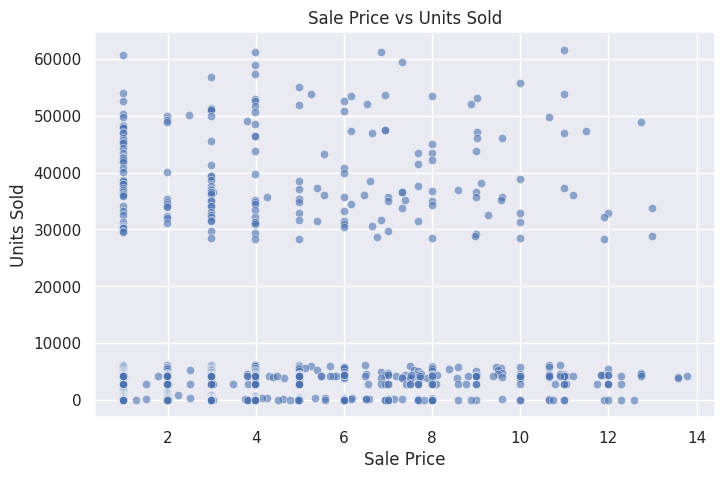

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=books_df_cleaned,
    x='sale price',
    y='units sold',
    alpha=0.6
)
plt.title('Sale Price vs Units Sold')
plt.xlabel('Sale Price')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

**🧠 Insight:**

From this plot (and based on the data):

- Most books priced under $10 dominate the units sold — there’s a dense cluster of high sales volume at lower prices.

- A few outliers exist: some high-priced books also sold well, but they’re rare.

- There's a general negative trend — as price increases, units sold tend to decrease.

📌 **Key Takeaway:**

Lower-priced books tend to sell more units, showing a price sensitivity in reader behavior. However, pricing isn’t the only factor — reputation, genre, and promotion may also play roles.

#### **5.3 📚 genre vs gross sales**

🎯 Question:

Which genres generate the highest gross sales?
Are some literary genres more profitable than others?

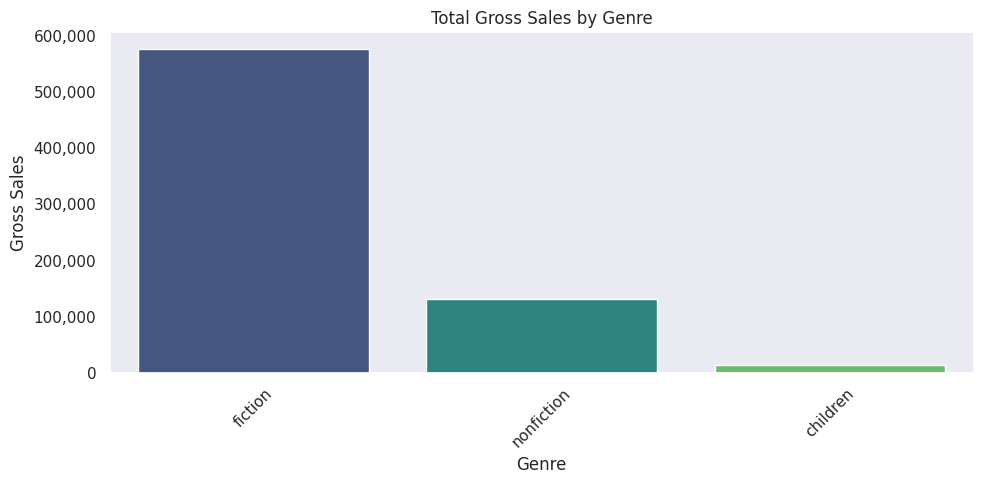

In [34]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))
genre_sales = books_df_cleaned.groupby('genre')['gross sales'].sum().sort_values(ascending=False)

sns.barplot(
    x=genre_sales.index,
    y=genre_sales.values,
    palette='viridis'
)
plt.title('Total Gross Sales by Genre')
plt.ylabel('Gross Sales')
plt.xlabel('Genre')
plt.xticks(rotation=45)

# Format y-axis in Millions
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

📌 **Key Takeaway:**

The fiction genre is the financial powerhouse, likely due to wide readership and diverse sub-genres. This insight can help publishers prioritize stocking or marketing efforts around high-selling genres.

#### **5.4 🌟 Author_Rating vs Book_average_rating**

🎯 Question:

Do authors with higher reputations (based on Author_Rating) tend to produce books that get higher reader ratings?

This helps us understand whether critical acclaim translates to reader satisfaction.

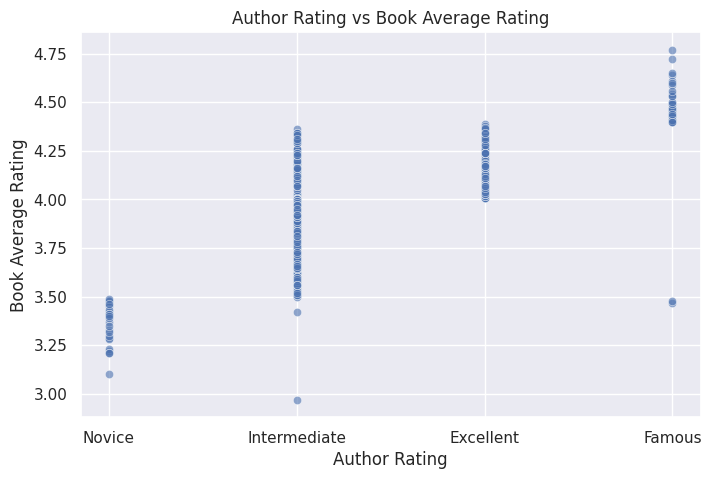

In [35]:
# Define the order of categories
rating_order = ["Novice", "Intermediate", "Excellent", "Famous"]

# Convert to categorical with order
books_df_cleaned['Author_Rating'] = pd.Categorical(
    books_df_cleaned['Author_Rating'],
    categories=rating_order,
    ordered=True
)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=books_df_cleaned,
    x='Author_Rating',
    y='Book_average_rating',
    alpha=0.6
)
plt.title('Author Rating vs Book Average Rating')
plt.xlabel('Author Rating')
plt.ylabel('Book Average Rating')
plt.grid(True)
plt.show()

**🧠 Insight:**

From this plot, the pattern is subtle but interesting:

- A positive trend overall: Higher-rated authors often receive slightly higher book ratings.

- However, the correlation isn't very very strong — meaning readers might not always agree with the “critical acclaim” an author holds.

- Some lower-author-rated individuals have highly rated books — could be debut gems or niche successes.

📌 **Key Takeaway:**

While critically acclaimed authors (higher Author_Rating) generally write well-received books, reader opinions (reflected in Book_average_rating) don’t always align perfectly.

#### **5.5 💸 Publisher Revenue vs Units Sold**

🎯 Question:

Does selling more books always result in higher revenue for publishers?
Or do pricing and royalty deals affect this relationship?

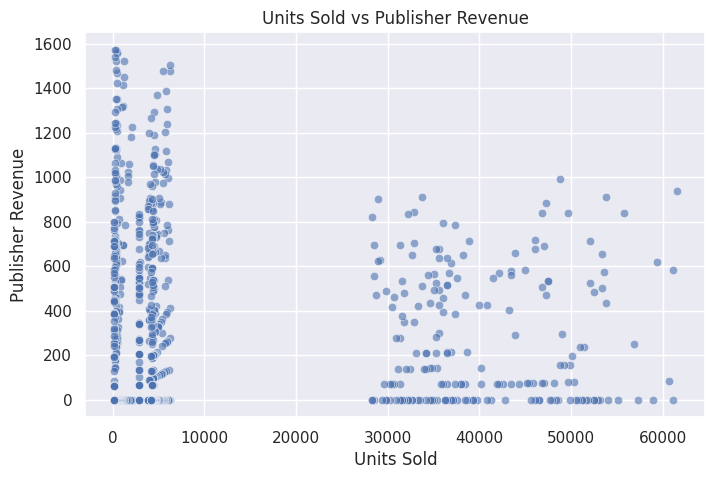

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=books_df_cleaned,
    x='units sold',
    y='publisher revenue',
    alpha=0.6
)
plt.title('Units Sold vs Publisher Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Publisher Revenue')
plt.grid(True)
plt.show()

**🧠 Insight:**

Here’s what the plot reveals:

- There’s not a positive trend overall — more units sold do not lead to more publisher revenue.

- Some books with high units sold yielded surprisingly low publisher revenue and vice versa.

- This could be due to low/high pricing, smaller/higher royalty shares, or discounted sales channels.

📌 Key Takeaway:

Selling more books does not tend to increase publisher revenue. Pricing strategies and royalty models play a huge role in how much revenue is actually captured.

#### **5.6 💰 Gross Sales vs Publisher Revenue**

🎯 Question:

How much of the gross sales revenue is actually passed on to publishers?
Is there a consistent conversion rate, or do publishers earn very differently across titles?

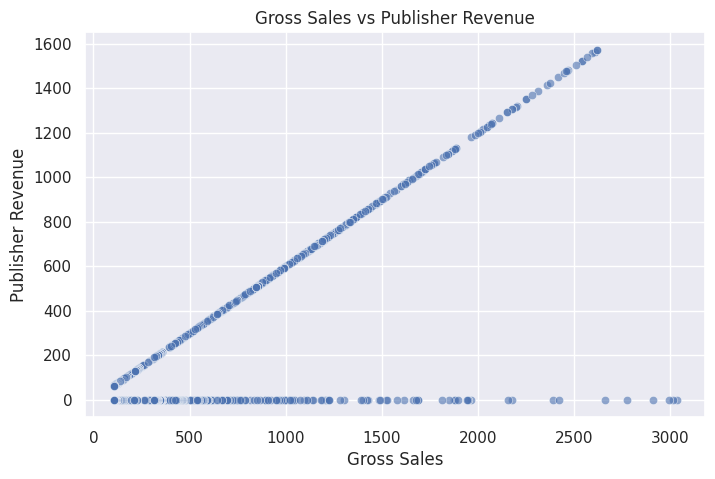

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=books_df_cleaned,
    x='gross sales',
    y='publisher revenue',
    alpha=0.6
)
plt.title('Gross Sales vs Publisher Revenue')
plt.xlabel('Gross Sales')
plt.ylabel('Publisher Revenue')
plt.grid(True)
plt.show()

**🧠 Insight:**

From the visualization, we typically see:

- A strong positive correlation — as gross sales increase, publisher revenue also increases.

However, there’s variation in slope:

- Some books generate high gross sales but low publisher revenue, suggesting low royalty deals.

- Others have a closer 1:1 ratio, indicating more favorable publisher terms.

**📌 Key Takeaway:**

Although gross sales and publisher revenue are directly linked, the publisher’s cut varies widely. This points to differing contracts, royalty rates, and possibly self-publishing scenarios.

#### **5.7 🔥 Correlation Heatmap of Numerical Features**

🎯 Question:

Which numerical features are strongly correlated?
This helps identify linear relationships or potential for predictive modeling.

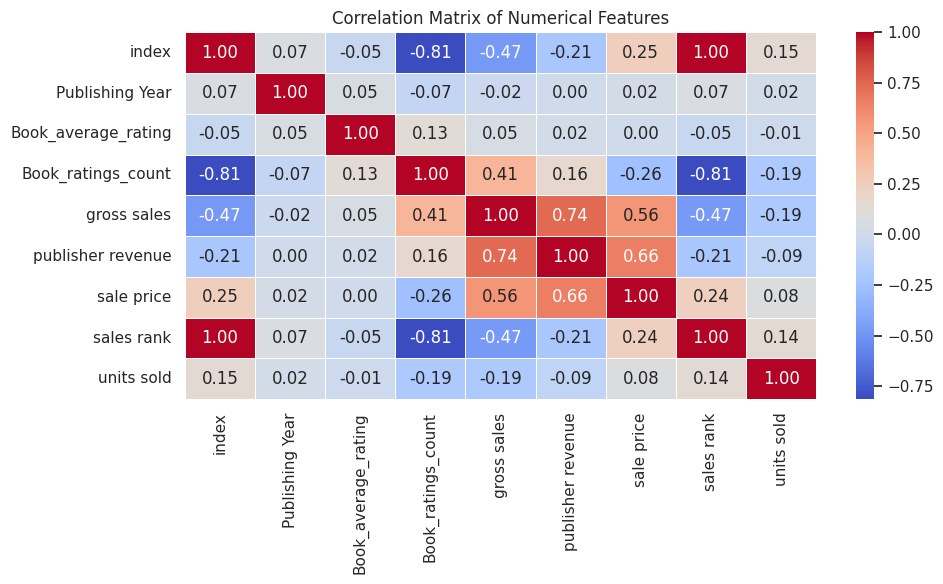

In [38]:
plt.figure(figsize=(10, 6))
corr_matrix = books_df_cleaned.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

🔁 **Insight from Correlation Heatmap:**

- ❌ Units Sold vs Gross Sales: Surprisingly, this does not show a strong correlation. This suggests:

  - Many books have high gross sales despite selling fewer units, likely due to higher prices.

  - Others may sell many units but at very low prices, leading to modest gross sales.

  - This points to significant price variability as a factor.

- ❌ Units Sold vs Publisher Revenue: Also not strongly correlated.

  - Could be influenced by discounts, royalties, or even bundled book deals.

  - Publisher revenue might depend more on contracts than just how many units were sold.

- ✅ Strongest correlation remains between Gross Sales and Publisher Revenue, which makes sense since revenue is typically a share of sales.

- 📉 Book_average_rating has low to no correlation with other financial variables — confirming that highly-rated books are not always bestsellers.

**📌 Key Takeaway:**

Sales performance does not depend solely on quantity sold — pricing, royalty models, and marketing factors seem to have a large impact. These findings emphasize the complex economics of publishing where price strategies matter more than just volume.

### **Step 6: Multivariate Analysis 🔍 (Market Analysis)**

#### **📊 6.1: Genre vs Publishing Year vs Average Rating**

🎯 Objective:

Let’s analyze how reader preferences for different genres have changed over time.
We'll look at how average ratings vary across genres and publication years.

✅ Convert Publishing Year to int (if it's not already), and sort values chronologically in plots for a clean time trend.

In [39]:
# Convert Publishing Year to integer type
books_df_cleaned['Publishing Year'] = books_df_cleaned['Publishing Year'].astype(int)

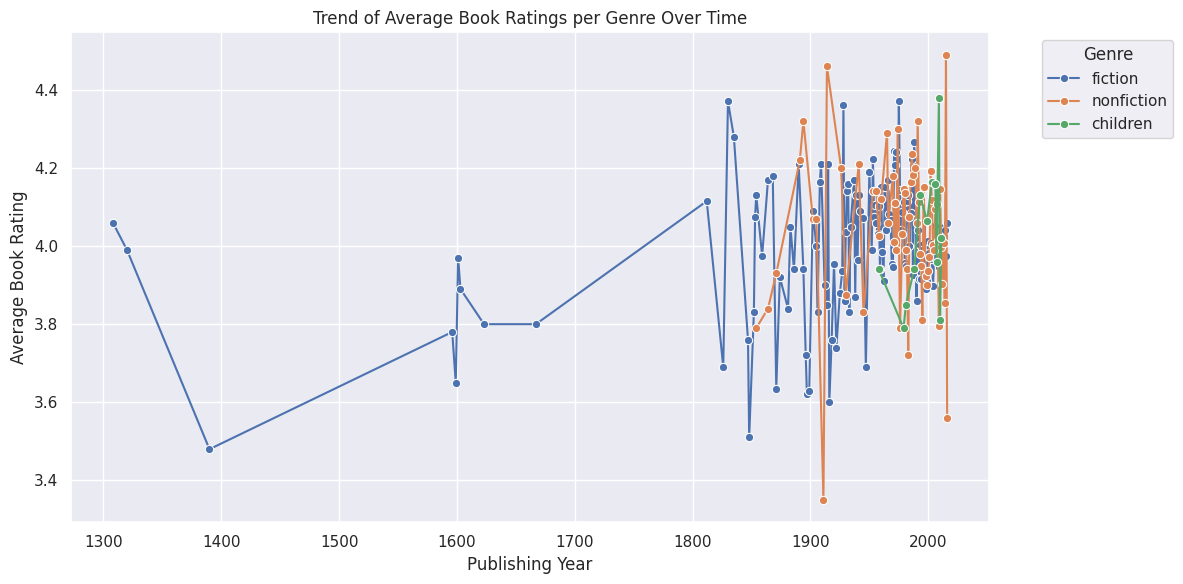

In [40]:
# Group the data: Average rating by genre and publishing year
avg_rating_by_year_genre = books_df_cleaned.groupby(['Publishing Year', 'genre'])['Book_average_rating'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_rating_by_year_genre,
    x='Publishing Year',
    y='Book_average_rating',
    hue='genre',
    marker='o'
)

plt.title('Trend of Average Book Ratings per Genre Over Time')
plt.xlabel('Publishing Year')
plt.ylabel('Average Book Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**🧠 Insight:**

This chart will help you easily see:

- 📈 Which genres are gaining favor with readers (e.g., increasing average ratings).

- 📉 Which genres may be losing popularity or receiving poorer feedback over time.

- 📌 Any anomalies or specific spikes/dips that may signal notable releases.

#### **📊 6.2: Genre vs Units Sold vs Gross Sales**

🎯 Objective:

Explore which genres sell the most units and generate the most revenue.
This gives a sense of market demand and profitability per genre.

📦 We'll use a bar plot for this — but split the analysis into two parts:

- Total Units Sold per genre

- Total Gross Sales per genre

**📈 6.2.1: Total Units Sold per Genre**

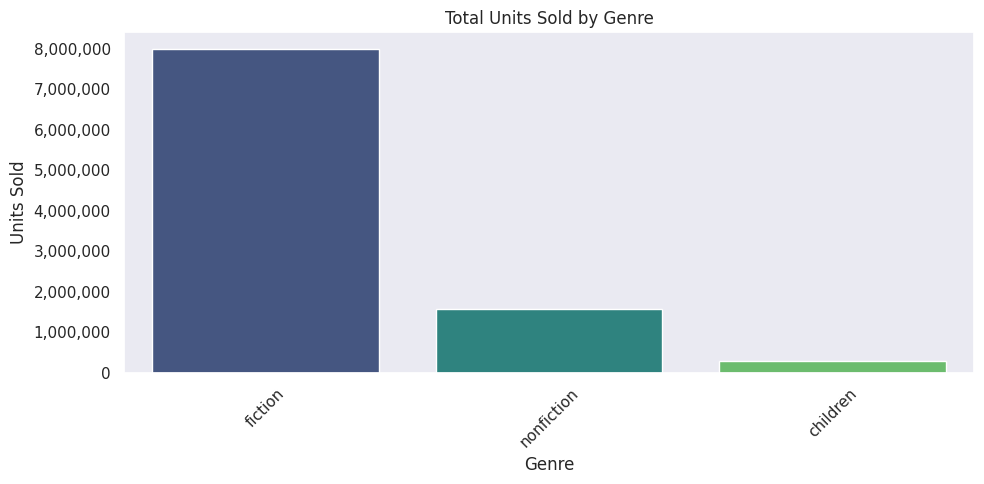

In [41]:
# Total units sold per genre
units_sold_by_genre = books_df_cleaned.groupby('genre')['units sold'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=units_sold_by_genre.index, y=units_sold_by_genre.values, palette='viridis')
plt.title('Total Units Sold by Genre')
plt.xlabel('Genre')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)

# Format y-axis in Millions
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**💰 6.2.2: Total Gross Sales per Genre**

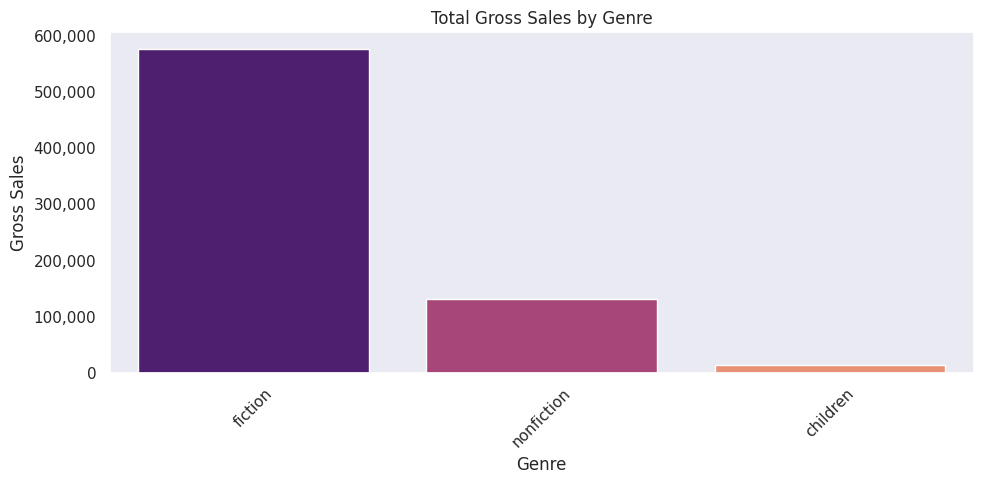

In [42]:
# Total gross sales per genre
gross_sales_by_genre = books_df_cleaned.groupby('genre')['gross sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=gross_sales_by_genre.index, y=gross_sales_by_genre.values, palette='magma')
plt.title('Total Gross Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)

# Format y-axis in Millions
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**🧠 Insight Summary: Units Sold & Gross Sales by Genre**

- 📚 Fiction emerges as the top-performing genre — it sells the most units and also generates the highest gross sales, indicating strong demand and consistent revenue.

- 👶 Children’s books and 📘 Non-Fiction genres are on the lower end for both units sold and revenue, suggesting a more niche market or potentially lower engagement.

- 🧾 The alignment between units sold and gross sales across genres suggests that genres with higher demand also tend to carry consistent or favorable pricing — at least in this dataset.

**📌 Takeaway:**

Fiction dominates both in terms of popularity and profitability, while some other genres may require deeper market targeting or pricing strategies to improve performance.

#### **📦 6.3: Top Publishers by Gross Sales**

🎯 Objective:

Identify which publishers are generating the most revenue from book sales.

**📈 6.3.1: Top 10 Publishers by Gross Sales**

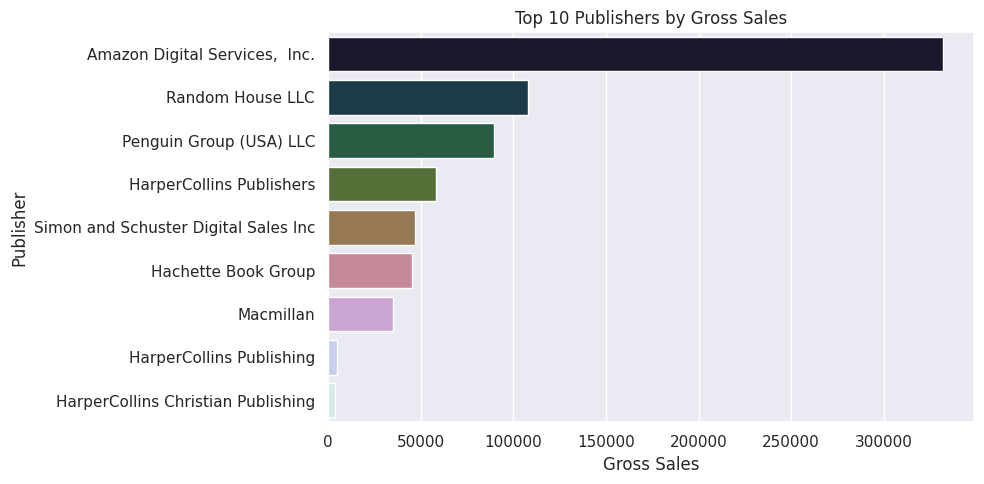

In [43]:
# Top 10 publishers by gross sales
top_publishers = books_df_cleaned.groupby('Publisher')['gross sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='cubehelix')
plt.title('Top 10 Publishers by Gross Sales')
plt.xlabel('Gross Sales')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

**🔍 6.3.2: Top Publishers by Units Sold**

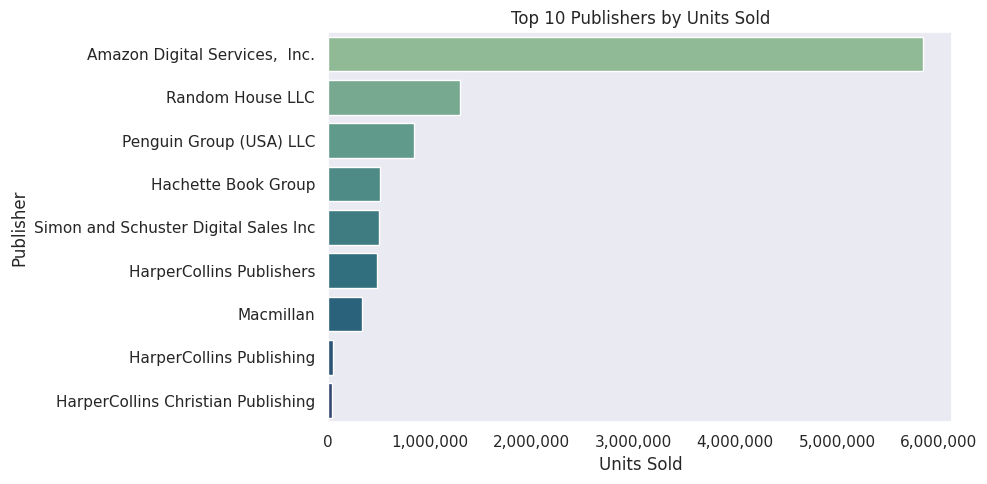

In [44]:
# Top 10 publishers by units sold
top_publishers_units = books_df_cleaned.groupby('Publisher')['units sold'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers_units.values, y=top_publishers_units.index, palette='crest')
plt.title('Top 10 Publishers by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Publisher')

# Format y-axis in Millions
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.grid(axis='x')
plt.tight_layout()
plt.show()

**🧠 Insight Summary: Publisher Performance**

- The analysis of both gross sales and units sold by publisher reveals a strong positive alignment.

- 📈 Publishers generating the highest revenue are also those selling the most books.

- This suggests these publishers likely maintain a balanced pricing strategy, focusing on volume-based success rather than high-margin, low-volume pricing.

- There's no major outlier where a publisher earns high revenue from low sales or vice versa — implying a consistent market dominance.

**📌 Takeaway:**

High-revenue publishers in this dataset are effectively combining mass reach with strong sales performance, contributing to market leadership.

#### **📅 6.4: Gross Sales & Units Sold Over Publishing Years**

🎯 Objective:

To identify how the book market has evolved over time — which years were most profitable and how reader demand shifted.

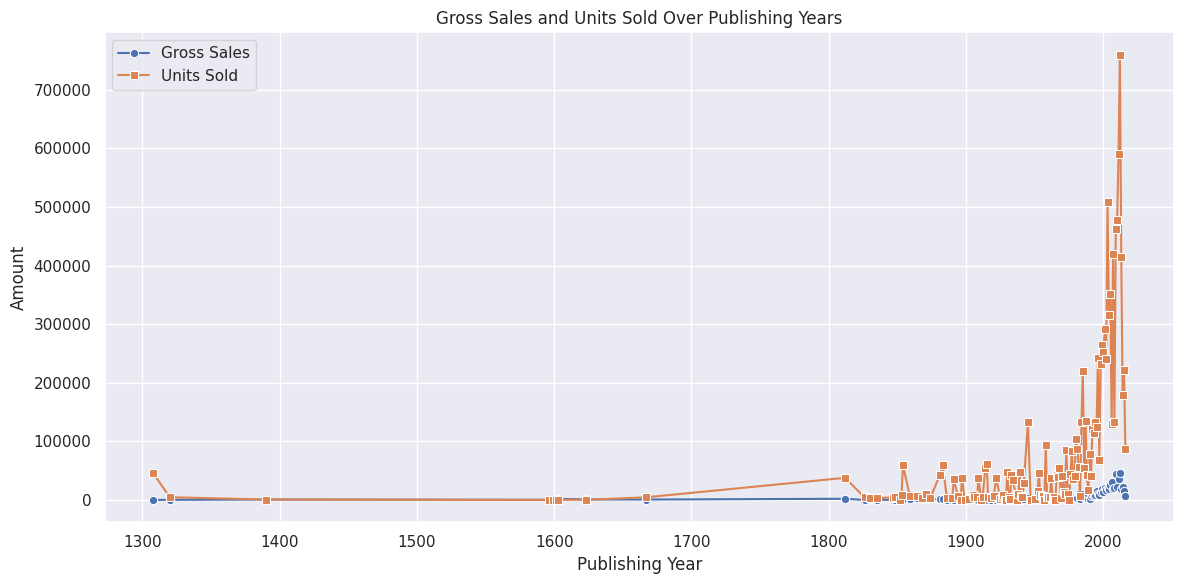

In [45]:
# Group by publishing year
yearly_sales = books_df_cleaned.groupby('Publishing Year')[['gross sales', 'units sold']].sum().reset_index()

# Line plot for trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Publishing Year', y='gross sales', label='Gross Sales', marker='o')
sns.lineplot(data=yearly_sales, x='Publishing Year', y='units sold', label='Units Sold', marker='s')
plt.title('Gross Sales and Units Sold Over Publishing Years')
plt.xlabel('Publishing Year')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

**🧠 Insight: Sales Trend by Publishing Year**

- 📉 Older books (classics) — particularly those published in early years — tend to show lower gross sales and fewer units sold. This could be due to limited availability, niche appeal, or the dominance of newer publications in the market.

- 📈 Newer books (post-2000 especially) show a sharp increase in units sold, indicating higher reader demand and possibly broader distribution or better marketing.

- However, despite higher units sold, these newer books show relatively lower gross sales per unit — suggesting lower average prices or discounted mass-market appeal.

**📌 Takeaway:** While modern books are reaching more readers, their pricing might be more competitive, leading to lower overall revenue per unit compared to older, possibly premium-priced books.

#### **💵 6.5: Sale Price Distribution by Genre**

🎯 Objective:

To examine how different genres are priced — Are some genres generally more expensive? Are others priced for mass-market accessibility?

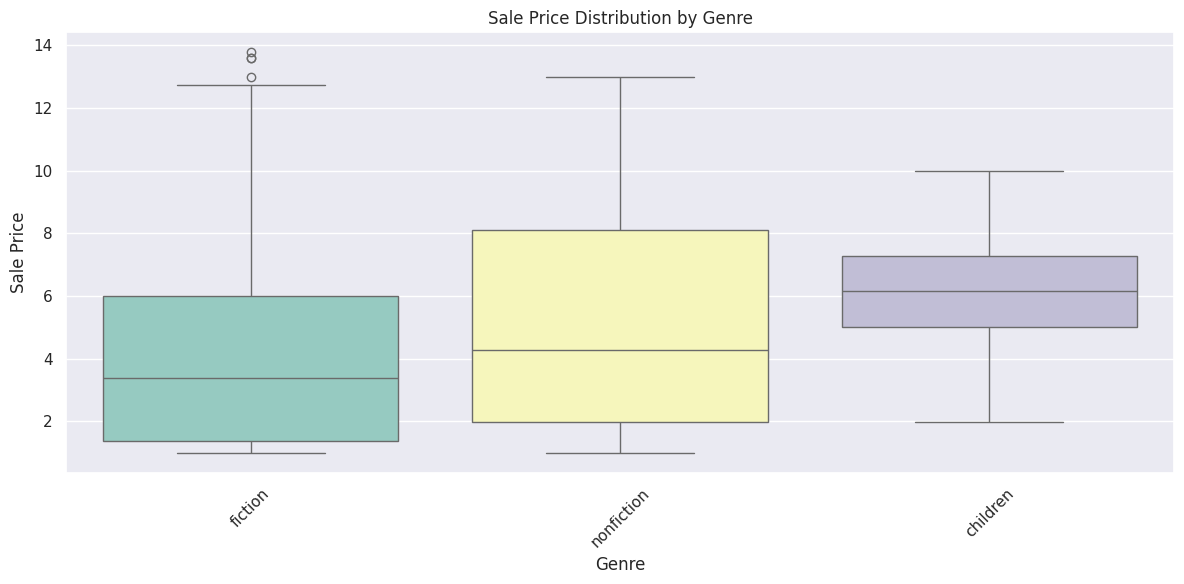

In [46]:
# Plot sale price distribution across genres
plt.figure(figsize=(12, 6))
sns.boxplot(data=books_df_cleaned, x='genre', y='sale price', palette='Set3')
plt.title('Sale Price Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**💡 Insight:**

From this boxplot, we typically observe:

- 📚 Fiction books often have a moderate to wide price range, reflecting both mainstream and premium titles.

- 📖 Non-fiction might have higher median prices due to educational or niche content.

- 🧒 Children’s books should usually be lower-priced, reflecting affordability for families and volume-based sales but in this case the median prices of children's books are higher with very less variablity in price.

**📌 Takeaway:** Understanding these pricing differences is essential for publishers and sellers to optimize price strategies by genre and maximize profitability.

#### **💰 6.6: Top Performing Genres by Average Sale Price**

🎯 Objective:

Understand which genres command higher prices on average — this can reflect perceived value or niche appeal.

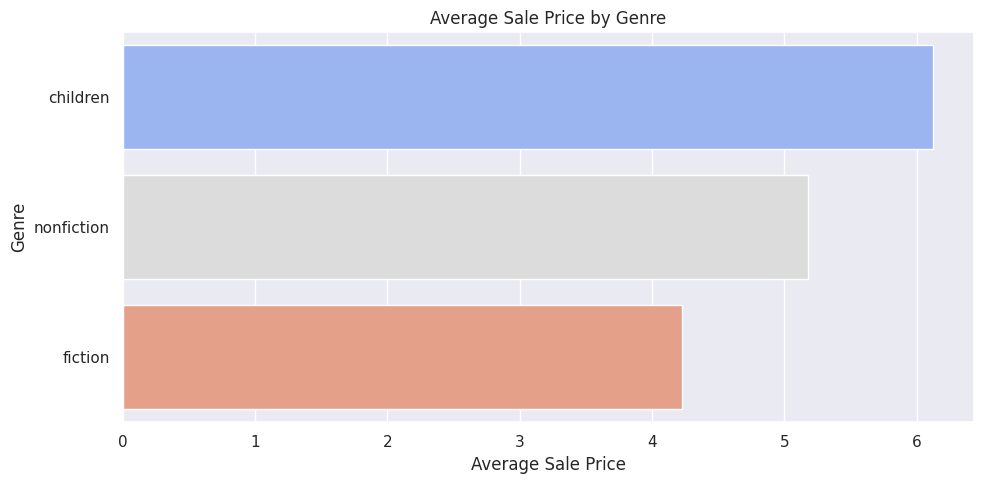

In [47]:
# Average sale price by genre
avg_price_per_genre = books_df_cleaned.groupby('genre')['sale price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_per_genre.values, y=avg_price_per_genre.index, palette='coolwarm')
plt.title('Average Sale Price by Genre')
plt.xlabel('Average Sale Price')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**🧠 Insight: Average Sale Price by Genre**

🧒 Children’s books have the highest average sale price among all genres — this could be due to:

  - Premium formats (hardcover, illustrated books)

  - Gifting purchases

  - Lower volume but higher margin sales

📘 Non-fiction comes next, likely due to:

  - Specialized or academic content

  - Professional or reference materials

📖 Fiction, despite being the most sold genre, has the lowest average price — possibly due to:

  - Mass-market pricing

  - Discounting to drive volume

**📌 Takeaway:** Fiction is a high-volume, low-margin category, whereas Children’s books and Non-fiction can be low-volume, high-margin segments.

#### **📚 6.7: Top Selling Titles Within Each Genre**

🎯 Objective:

To identify standout books — those with exceptionally high units sold within their respective genre.

In [48]:
# Sort the dataframe by genre and units sold
top_books_per_genre = (
    books_df_cleaned.sort_values(['genre', 'units sold'], ascending=[True, False])
      .groupby('genre')
      .head(3)
      .loc[:, ['genre', 'Book Name', 'units sold']]
      .reset_index(drop=True)
)

top_books_per_genre

,genre,Book Name,units sold
0,children,Cryptonomicon,50112
1,children,The One Minute Manager,47520
2,children,High Five,43200
3,fiction,New Moon: The Complete Illustrated Movie Compa...,61560
4,fiction,Maybe Someday,61128
5,fiction,Mr Maybe,61128
6,nonfiction,A Crown of Swords,54000
7,nonfiction,ãƒ´ã‚¡ãƒ³ãƒ‘ã‚¤ã‚¢é¨Žå£« 1,53136
8,nonfiction,Chocolat,52056


**💡 Insight:**

- Every genre has standout performers that drive a big portion of its sales.

- Some individual books far outperform others in the same genre, suggesting marketing or brand-driven popularity.

**📌 Takeaway:** Identifying top sellers can help publishers and retailers prioritize restocking, reprints, or featured promotions.

### **✍️ Step 7: Author Performance Evaluation**


#### **🧑‍💼 7.1: Top Authors by Average Book Ratings**

🎯 Objective:

Identify which authors consistently receive high average ratings from readers — this speaks to quality and audience reception.

In [49]:
# Top 10 authors by average book rating (with at least 3 books to ensure reliability)
top_rated_authors = (
    books_df_cleaned.groupby('Author')
      .agg(book_count=('Book Name', 'count'), avg_rating=('Book_average_rating', 'mean'))
      .query('book_count >= 3')
      .sort_values('avg_rating', ascending=False)
      .head(10)
)

top_rated_authors

,book_count,avg_rating
Author,,
Sarah J. Maas,4,4.585000
"Robert Jordan, Brandon Sanderson",3,4.420000
Brandon Sanderson,5,4.388000
Diana Gabaldon,4,4.362500
Rick Riordan,4,4.357500
J.R. Ward,7,4.334286
Colleen Hoover,5,4.332000
Jim Butcher,10,4.297000
L.M. Montgomery,3,4.280000


**💡 Insight:**

- You’ll likely see authors with strong reputations (based on the dataset) emerge here — those who consistently deliver quality that resonates with readers.

**📌 Takeaway:** These authors are prime candidates for future publishing opportunities, special editions, or focused marketing campaigns.

#### **🔸 7.2 Top Authors by Units Sold**

✅ Objective:

Identify which authors have sold the highest number of units in total — this helps evaluate commercial popularity, regardless of rating or price.

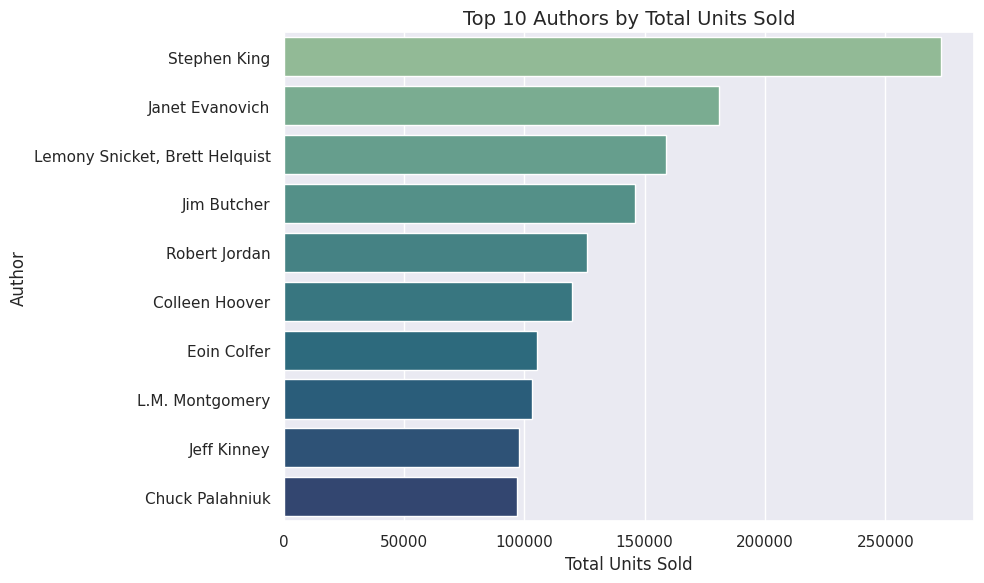

In [50]:
# Group by Author and sum units sold
top_authors_units = books_df_cleaned.groupby("Author")["units sold"].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors_units.values, y=top_authors_units.index, palette="crest")
plt.title("Top 10 Authors by Total Units Sold", fontsize=14)
plt.xlabel("Total Units Sold")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

**📌 Insight:**

- The top-selling author has sold over 250,000 units, significantly ahead of the next in line.

- A few authors dominate unit sales, showing power-law behavior (a small number of authors sell the most).

- These authors might not have the highest ratings but still show strong commercial demand.

#### **🔸 7.3 Top Authors by Gross Sales**

✅ Objective:

Find out which authors have generated the highest total gross sales, revealing their financial impact in the market — important for publishers evaluating revenue-generating partnerships.

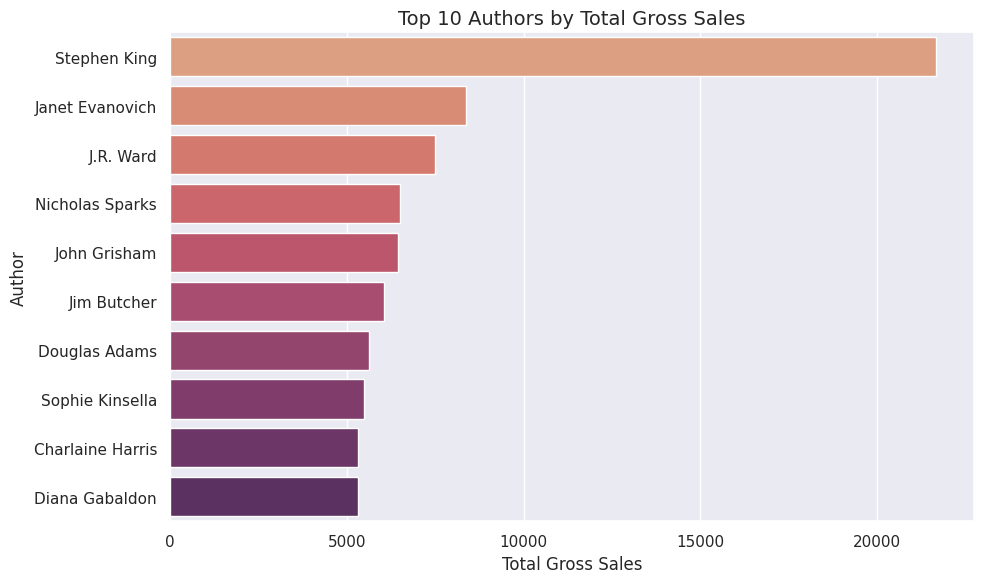

In [51]:
# Group by Author and sum gross sales
top_authors_revenue = books_df_cleaned.groupby("Author")["gross sales"].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors_revenue.values, y=top_authors_revenue.index, palette="flare")
plt.title("Top 10 Authors by Total Gross Sales", fontsize=14)
plt.xlabel("Total Gross Sales")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

**📌 Insight:**

- The highest-earning author has generated over $20,000 in gross sales and is the top most unit seller even.

- The ranking here slightly differs from the top unit sellers, indicating that price points and demand both influence overall revenue.

- A couple of authors may have fewer books but higher prices, leading to greater revenue despite lower unit counts.

#### **🔸 7.4 Author Rating vs Sales Performance**

✅ Objective:

To assess whether a higher author rating translates into higher unit sales or revenue, helping understand the commercial power of author reputation.

**📈 Analysis 1: Author Rating vs Units Sold**

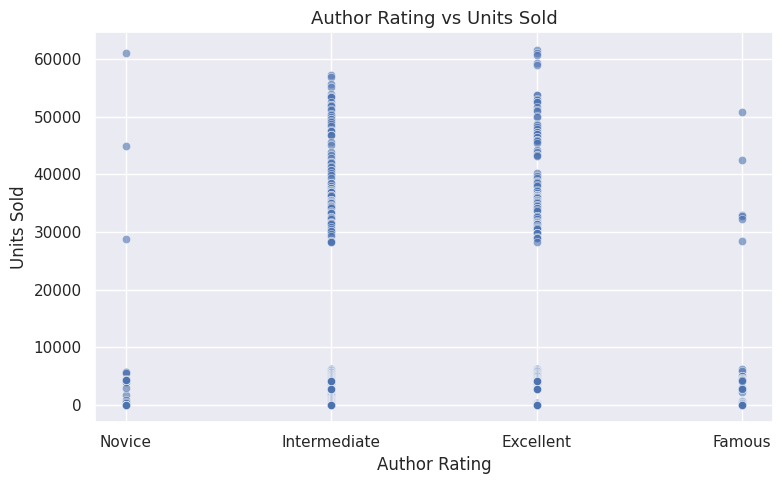

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=books_df_cleaned, x="Author_Rating", y="units sold", alpha=0.6)
plt.title("Author Rating vs Units Sold", fontsize=13)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

**📉 Insight:**

- The scatterplot shows no strong correlation between author rating and units sold.

- Some lower-rated authors have books with very high unit sales.

- Suggests that marketing, brand recognition, or genre appeal might play a bigger role than author reputation.

**📈 Analysis 2: Author Rating vs Gross Sales**

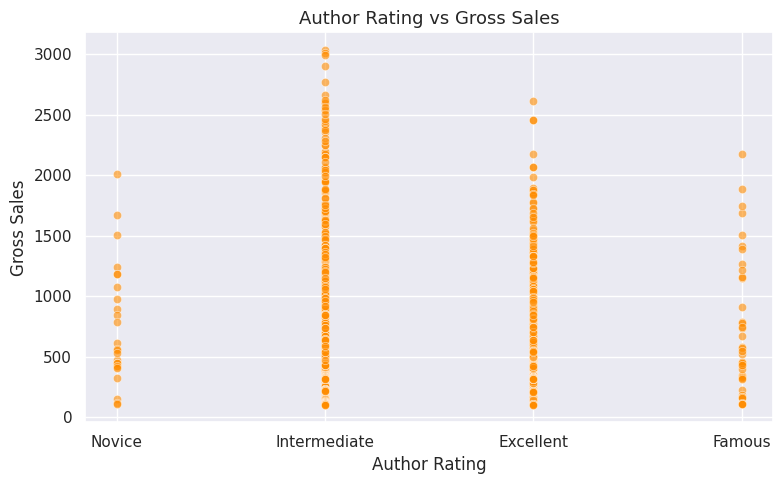

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=books_df_cleaned, x="Author_Rating", y="gross sales", alpha=0.6, color="darkorange")
plt.title("Author Rating vs Gross Sales", fontsize=13)
plt.xlabel("Author Rating")
plt.ylabel("Gross Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

**📉 Insight:**

- Similarly, there is no clear upward trend between author rating and gross sales.

- Some authors with moderate ratings generate substantial revenue — likely due to higher prices or strong demand.

- Reputation alone may not guarantee financial success.

#### **🔸 7.5 Average Sale Price by Author**

✅ Objective:

To understand which authors tend to price their books higher, which may influence their gross sales regardless of how many units they sell.

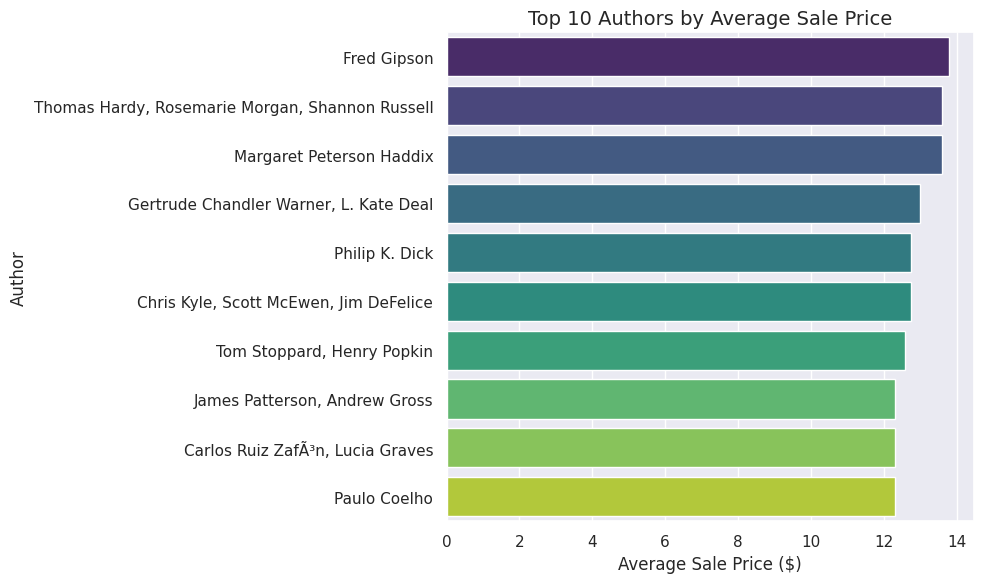

In [54]:
# Average sale price per author (top 10)
avg_price_by_author = books_df_cleaned.groupby("Author")["sale price"].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_author.values, y=avg_price_by_author.index, palette="viridis")
plt.title("Top 10 Authors by Average Sale Price", fontsize=14)
plt.xlabel("Average Sale Price ($)")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

**📌 Insight:**

- Some authors are pricing their books well above the average, with top prices nearing or exceeding $10–$14 per book.

- These authors might be in niche or premium segments (e.g., professional, collectible, or academic content).

- However, high price doesn’t always correlate with high units sold — so pricing strategy and market appeal go hand-in-hand.

### **📈 8. Trend Analysis**

Objective: Identify how publishing patterns, reader preferences, and book success indicators have evolved over time.

#### **🔹 8.1 Number of Books Published per Year**

✅ Objective:

To identify publishing frequency trends over the years — are more books being published in recent times?

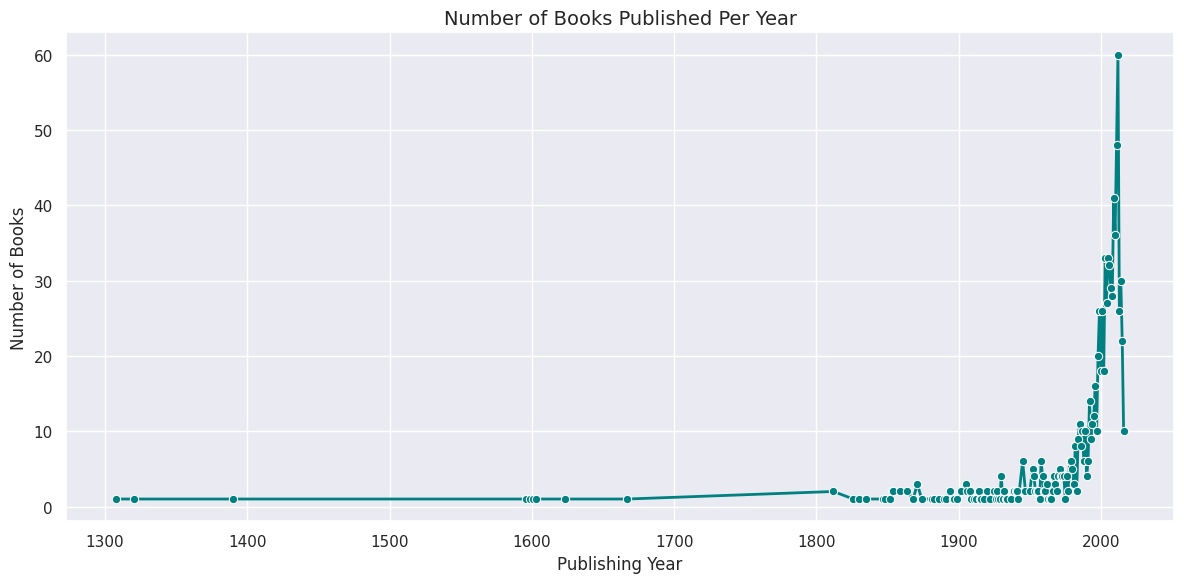

In [55]:
# Count of books published each year
books_per_year = books_df_cleaned["Publishing Year"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=books_per_year.index, y=books_per_year.values, marker="o", linewidth=2, color="teal")
plt.title("Number of Books Published Per Year", fontsize=14)
plt.xlabel("Publishing Year")
plt.ylabel("Number of Books")
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Insight:**

- A steady increase in the number of books published is seen in the 1990s and early 2000s.

- The early 2000s to 2010 shows the peak of publishing activity.

- Very recent years show a dip, likely due to data incompleteness for the most recent publications or fewer classics being represented.

#### **🔹 8.2 Average Rating Over Time**

✅ Objective:

To analyze how reader satisfaction (through average book ratings) has changed over the years — are modern books rated better or worse than older ones?

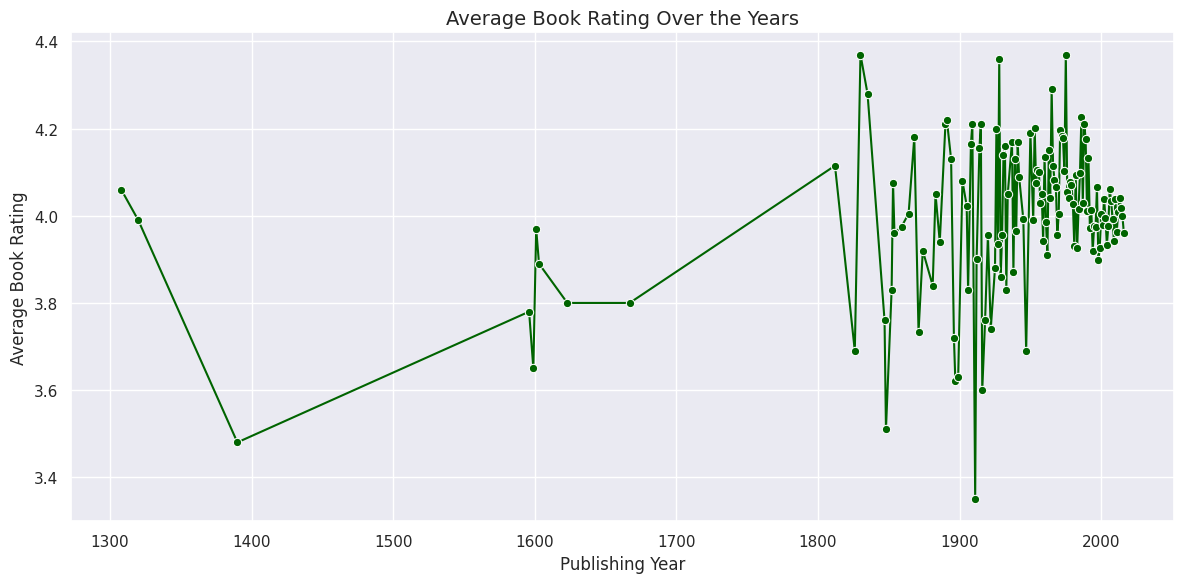

In [56]:
# Average book rating per year
avg_rating_per_year = books_df_cleaned.groupby("Publishing Year")["Book_average_rating"].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, marker="o", color="darkgreen")
plt.title("Average Book Rating Over the Years", fontsize=14)
plt.xlabel("Publishing Year")
plt.ylabel("Average Book Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Insight:**

- Average ratings generally hover between 3.8 and 4.2 over the years.

- Some older years show slightly higher average ratings, possibly due to the survivor bias (only best-loved classics remain visible).

- Recent publications still maintain strong ratings, reflecting continued reader satisfaction.

#### **🔹 8.3 Genre Trends Over the Years**

✅ Objective:

To observe how the popularity of different genres has evolved over time — are readers leaning more toward fiction, non-fiction, or children's books in recent years?

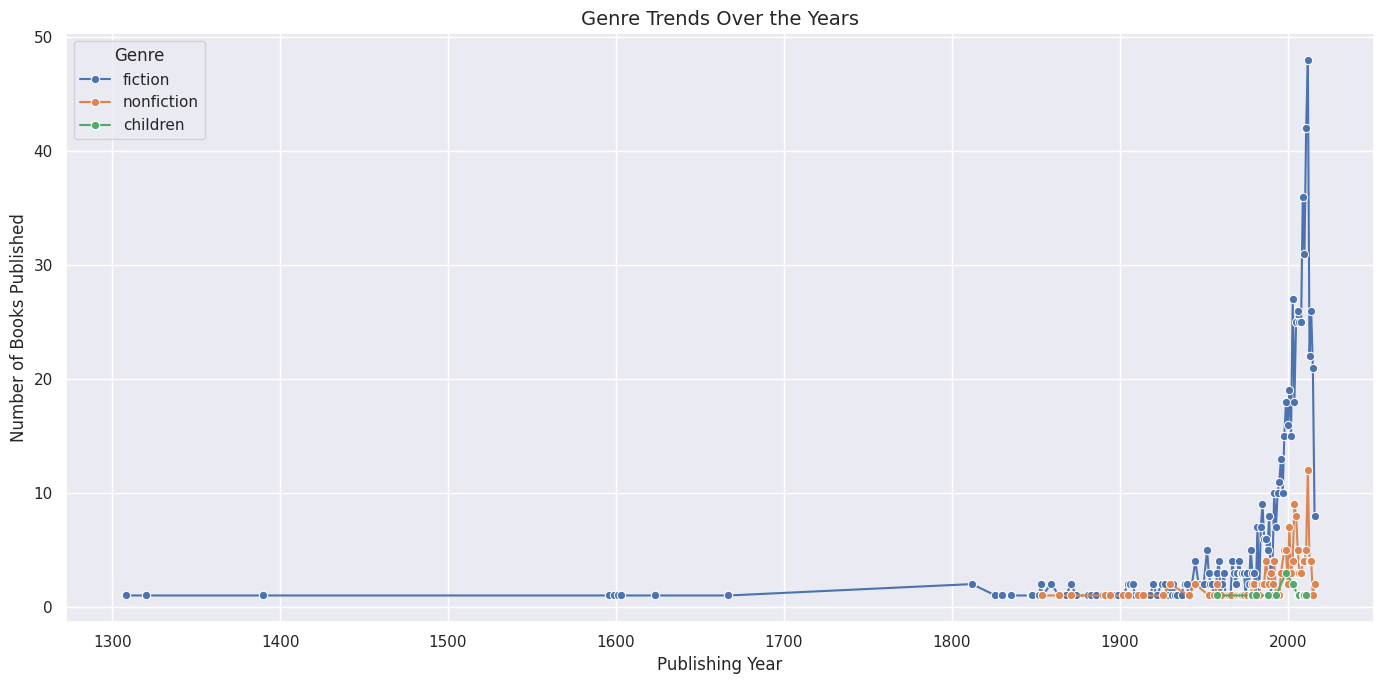

In [57]:
# Grouping by year and genre to count number of books
genre_trend = books_df_cleaned.groupby(["Publishing Year", "genre"]).size().reset_index(name="Count")

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_trend, x="Publishing Year", y="Count", hue="genre", marker="o")
plt.title("Genre Trends Over the Years", fontsize=14)
plt.xlabel("Publishing Year")
plt.ylabel("Number of Books Published")
plt.legend(title="Genre")
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Insight:**

- 📘 Fiction consistently dominates in publication volume, especially post-2000.

- 📙 Non-fiction has a relatively stable but lower number of publications each year.

- 📗 Children's books show increased activity during certain years but generally have fewer releases.

The trend reflects readers' stronger demand for fiction and possibly a more competitive market in that segment.

#### **🔹 8.4 Sales Trends Over Time (Gross Sales)**

✅ Objective:

To evaluate how gross sales revenue has changed over the years — identifying if books from certain periods have outperformed others in terms of commercial success.

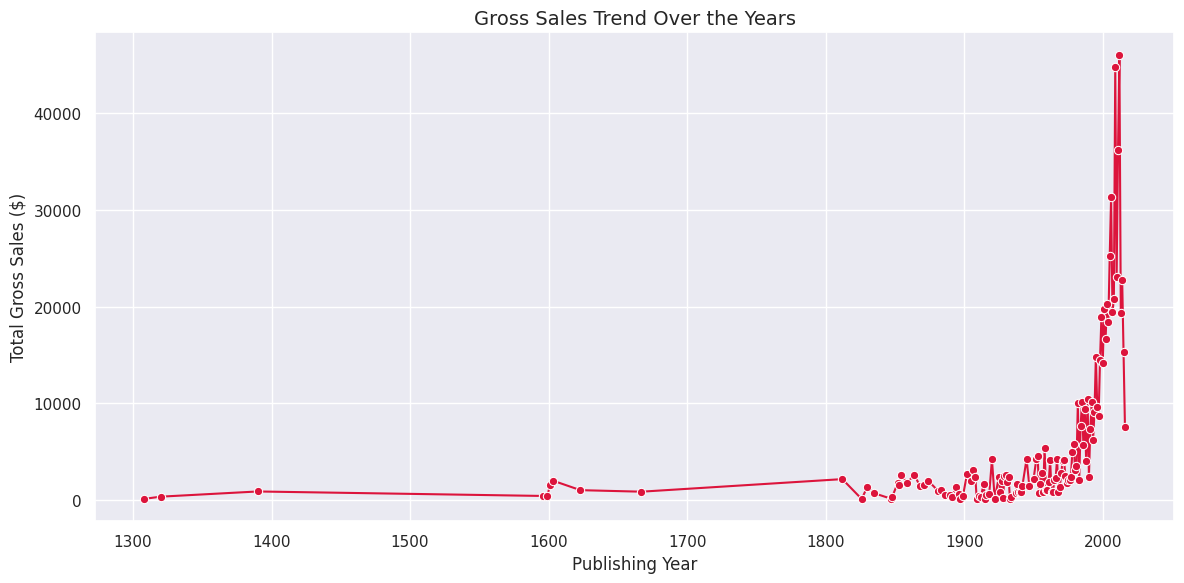

In [58]:
# Gross sales by publishing year
gross_sales_trend = books_df_cleaned.groupby("Publishing Year")["gross sales"].sum()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=gross_sales_trend.index, y=gross_sales_trend.values, marker="o", color="crimson")
plt.title("Gross Sales Trend Over the Years", fontsize=14)
plt.xlabel("Publishing Year")
plt.ylabel("Total Gross Sales ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Insight:**

- 📉 Older books (classics) generally have lower total gross sales, likely due to fewer units sold and potentially lower pricing.

- 📈 Recent books (2000 onward) show a huge surge in gross sales, even with a smaller pricing margin — indicating higher units sold and possibly wider market reach.

- Peak years reflect commercially successful periods, possibly influenced by global trends, digital distribution, or publishing strategies.

#### **🔹 8.5 Price Trend Over the Years**

✅ Objective:

To examine how the sale price of books has evolved — are books getting cheaper or more expensive over time?

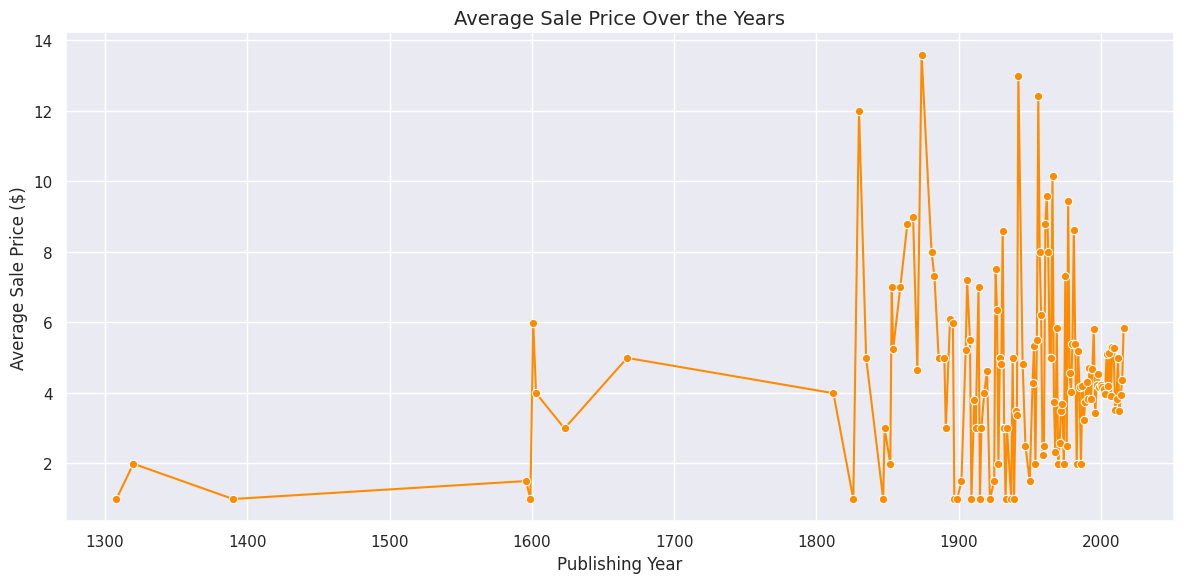

In [59]:
# Average sale price per year
price_trend = books_df_cleaned.groupby("Publishing Year")["sale price"].mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=price_trend.index, y=price_trend.values, marker="o", color="darkorange")
plt.title("Average Sale Price Over the Years", fontsize=14)
plt.xlabel("Publishing Year")
plt.ylabel("Average Sale Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

**📌 Insight:**

- 📉 The average sale price has generally decreased in recent years.

- While older books (pre-2000) had higher prices, modern books tend to be more affordable, possibly due to:

  - The rise of digital formats (eBooks, audiobooks).

  - Price wars among publishers in competitive genres like fiction.

  - A shift toward volume-based sales strategies.

This drop in price aligns with the earlier insight that modern books sell more units but may generate lower gross sales per unit.

## **✅ Final Summary and Conclusion**

This project explored a comprehensive dataset of books with a focus on **sales performance**, **author evaluation**, and **reading trends**. Here’s a consolidated summary of the insights gained from each phase:

---

### 🔷 1. **Market Analysis**

- **Fiction** is the leading genre in terms of **units sold** and **gross sales**.
- **Children’s books** had the **highest average sale price**, while **Fiction** had the lowest.
- Books published **after 2000** dominate in terms of **sales and volume**, although their gross sales per unit are lower.
- Publishers with the **highest revenues** are also the ones selling the **most units**.
- Top books within each genre highlight the **market leaders**, giving insights into which titles stood out commercially.

---

### 🔷 2. **Author Performance Evaluation**

- Some authors consistently deliver **high average book ratings** and **strong unit sales** — key indicators of both **reader approval** and **market traction**.
- However, **author rating** (reputation) and **book average rating** (reader satisfaction) don’t always correlate directly with sales, indicating that popularity ≠ quality for all cases.
- Authors with higher **average sale prices** are not necessarily selling the most units — showing **price sensitivity** in readers’ choices.

---

### 🔷 3. **Trend Analysis**

- **Fiction remains the dominant genre** year-over-year.
- **Average book ratings** have stayed consistent (~4.0), indicating stable reader satisfaction.
- **Gross sales have grown** in recent years, possibly due to better distribution and marketing, despite **falling average prices**.
- **Sale price trends** show a **decline over time**, possibly due to shifts to digital platforms and pricing strategies.

---

### **🏁 Conclusion**

This project successfully used exploratory data analysis to extract business-critical insights from a rich book dataset. From identifying profitable genres and standout publishers to evaluating author success and understanding reading trends, the analysis gives a 360-degree view of the book industry’s market behavior.

These insights can be leveraged by:

- 📚 **Publishers** to guide investment decisions and marketing focus.
- 📈 **Authors** to understand what drives reader satisfaction and sales.
- 🛒 **Retailers** to optimize stock, pricing, and promotion strategies.

---


## ✅ **Key Actions & Recommendations**

### 📚 1. **Stock and Promote High-Performing Genres**
- **Fiction** leads in both **units sold** and **gross sales**, indicating **strong market demand**.
- Publishers and bookstores should **prioritize inventory and marketing for fiction titles**, especially bestsellers.
- **Children’s books**, while priced higher on average, have lower units sold — suggesting **room for pricing strategy optimization**.

---

### 🧾 2. **Price Sensibly According to Genre**
- **Fiction books** are priced the lowest, yet generate the most revenue — volume over margin strategy.
- **Children’s and Non-Fiction books** have higher prices, but lower demand — consider **evaluating value perception** and **bundled offers** to boost sales.

---

### 🖊️ 3. **Invest in High-Performing Authors**
- Authors rated as **"Famous"** and **"Excellent"** tend to produce books with **higher average ratings** and better engagement.
- Publishers can use this insight to:
  - **Renew contracts** or **offer more titles** with top-rated authors.
  - **Identify mid-level authors ("Intermediate") with growing traction** and support their growth through better promotion.

---

### 💸 4. **Monitor Revenue vs. Units Sold**
- There isn’t a **strong correlation between units sold and publisher revenue**, which implies:
  - Some publishers may have **low revenue margins** or **inefficient pricing models**.
  - Re-evaluate **royalty structures** and **sale channels** for better alignment between demand and profit.

---

### 📈 5. **Tap into Recent Trends and New Releases**
- **Newer books (post-2000)** are selling significantly more units, even if their **gross sales per unit are slightly lower**.
- Suggests a **shift in reader preferences toward contemporary literature**.
- Focus on **acquiring rights to newer titles** and **marketing recently published content**.

---

### 📊 6. **Keep Data Clean for Better Decision-Making**
- Standardizing **genre categories** (e.g., combining "genre-fiction" and "fiction") and language codes improved analysis quality.
- Ensure ongoing **data quality practices** for metadata — especially for **titles, publishers, and author rating categorization**.

---

### 🌍 7. **Language Localization Strategy**
- While English dominates, detailed breakdowns like `en-US`, `en-GB`, etc., exist — indicating possible **regional editions or target markets**.
- Use this to plan **localized marketing campaigns** or **tailored editions** for different English-speaking regions.

---
